# 1) Basic User Input

This section imports the required packages and contains user input which shuld be reviewed every time the pipeline is used. 

In [1]:
import os
import pandas as pd
import sys
%matplotlib inline

Usually, this filepath must be adusted only once to specify where the .py file with all functions is stored.

In [2]:
# load custom functions
sys.path.insert(0, '/Users/timnoahkempchen/Desktop/SAP/Functions_grouped')


#from  Helper_functions import *
#from  Baseline_visualization import *
#from  Neighborhood_Community_analysis import *
#from  Analysis_dependent_on_CNs import *
from  All_functions import *

### Session Info

In [3]:
import session_info
session_info.show()

## 1.1) Filepaths 

Specify where the input dataframe (df) is stored as well as a path to store all output. 

The input data frame has to fullfill some minimal requirements: 
Data must be stored as pandas df (every row represents a cell)
1. The df must contain a __Sample ID__ for every cell
2. The df must contain one column each for __x__ and __y__ coordinates 
3. The df must contain one column specifying the __Cell Type__
4. The df must contain one column indicating the __Unique Region__ in which the cell was recorded 
5. The df should contain one column with an experimental condition or other type of __comparison__ 

In [4]:
input_file = "/Users/timnoahkempchen/Desktop/SAP/Data/Sample_data/subsetted_sample_data.csv"

output_dir = "/Users/timnoahkempchen/Downloads/Output_testnew/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

## 1.2) Reading the data

In [5]:
df = pd.read_csv(input_file)

In [6]:
df.columns

Index(['...1', 'CHGA', 'MMP9', 'CD36', 'CK7', 'PDL1', 'Bcatenin', 'Vimentin',
       'FoxP3', 'CD56', 'CD31', 'pH2AX', 'CD90', 'CD15', 'PD1', 'aSMA', 'CD25',
       'Ki67', 'Cytokeratin', 'CD20', 'CD4', 'CD11c', 'AnnexA1', 'Nestin',
       'p53', 'CD73', 'EGFR', 'MUC5AC', 'HLADR', 'COX2', 'BCL2', 'p63', 'CD3',
       'MUC2', 'CD8', 'CD45', 'PGA3', 'CD57', 'CD68', 'aDef5', 'CD34',
       'Podoplanin', 'CD38', 'CD11b', 'CD163', 'MUC1', 'CD138', 'Arginase1',
       'PP', 'CD79a', 'MUC6', 'region', 'x', 'y', 'sample', 'region_num',
       'CD206', 'CollIV', 'unique_region', 'Accession_number', 'Block_ID',
       'Sample_type', 'neigh_name', 'neigh_sub', 'community',
       'community common', 'Cell Type', 'Core Type', 'Accession number',
       'Sample', 'Block type', 'Initial block diagnosis', '% invasive',
       '%dysplasia', '%metaplasia+columnar', '% normal squam mucosa',
       '% HG dyspalsia', '% LG dysplasia', '% Glandular', '% metaplasia',
       'consensus diagnosis', 'Sub diagn

In [7]:
df = df[["Sample", "x", "y", "Cell Type", "unique_region", "consensus diagnosis"]]

## 1.3) Specify column names 

In [ ]:
sample_column = "sample" # Column specifies the analyzed samples. This could be an Identifier or a Case ID, etc. 
cell_type_column = "Cell Type" # Column specifies the respective cell type. This might be replaced with a broader cell types based on the specific analysis 
region_column = "unique_region" # This column should contain unique IDs for the respective regions 
X = "x" # Column containing coordinates on x axis 
Y = "y" # Column containing coordinates on y axis 
treatment_column ="consensus diagnosis" # Column containing comparisson, usally some kind of treatment/condition

In [ ]:
df["Cell Type"].unique()

# define major cell cathegories 
immune <- []
epithelial <- []
Mesenchymal <- []


In [ ]:
df.loc[df['Major Cell Cat'] == Immune]

In [ ]:
df['Major Cell Cat']

# 2) Basic Visualization & Analysis 

## 2.1) Specify additional information

In [ ]:
# Stacked bar plot
per_cat = "Major Cell Cat" 
grouping = 'consensus diagnosis'

norm=True
save_name= 'Major_subConsensus'

sub_col= 'Cell Type'
name_cat = 'Cell Type'
fig_sizing=(8,4)

pal_color=None
remove_leg=False


# Swarm plot 
sub_list = ['CD4+ Treg', "B"]
replicate_column = "unique_region"

cell_list = df["Major Cell Cat"].unique()

# correlation analysis 
sub_l = ['Immune','Epithelial','Mesenchymal']
save = True
## Set specific colors for figure 
coloring = None
## Specify order for x axis 
ordering = None 
## change figure size 
fig_size=8

## 2.1) Color dictionary generator

Original key list is : ['Foveloar' 'Plasma' 'Stroma' 'Nerve' 'Epithelial' 'Goblet' 'Neck'
 'Endothelial CD36hi' 'Smooth Muscle' 'Endothelial' 'Parietal'
 'Epithelial CK7+ p53+' 'Epithelial MUC1+ Ki67+' 'M1 Macrophage'
 'M2 Macrophage' 'CD4+ T cell PD1+' 'Foveloar Ki67+ p53+'
 'Epithelial CD73hi' 'CD4+ T cell' 'Squamous Annexin A1+' 'Neuroendocrine'
 'CD8+ T cell' 'Neutrophil' 'DC' 'Lymphatic' 'Epithelial Ki67+ p53+'
 'CD4+ Treg' 'Epithelial pH2AX+' 'CD8+ T cell PD1+' 'Epithelial p53+'
 'Chief' 'Endothelial aSMAhi' 'B cell' 'Squamous p63+'
 'Squamous p63+ EGFRhi' 'Stroma CD73+' 'Lymphatic CD73+' 'Foveloar p53+'
 'Neck p53+' 'Goblet p53+' 'Epithelial HLADR+' 'Goblet Ki67+ p53+'
 'Epithelial CK7+']
Original value list is : ['#1996F1', '#7C1470', '#D28003', '#9CD29A', '#36FC47', '#1B9C8A', '#6C6336', '#21360E', '#3FEDE0', '#EDDD9E', '#587F86', '#F79CD1', '#504184', '#FF0DA2', '#514A5E', '#E56730', '#D0CB64', '#83C08E', '#EDCC95', '#83E54D', '#E4EC6C', '#FFF253', '#6A0C5D', '#F1BD96', '#5C7

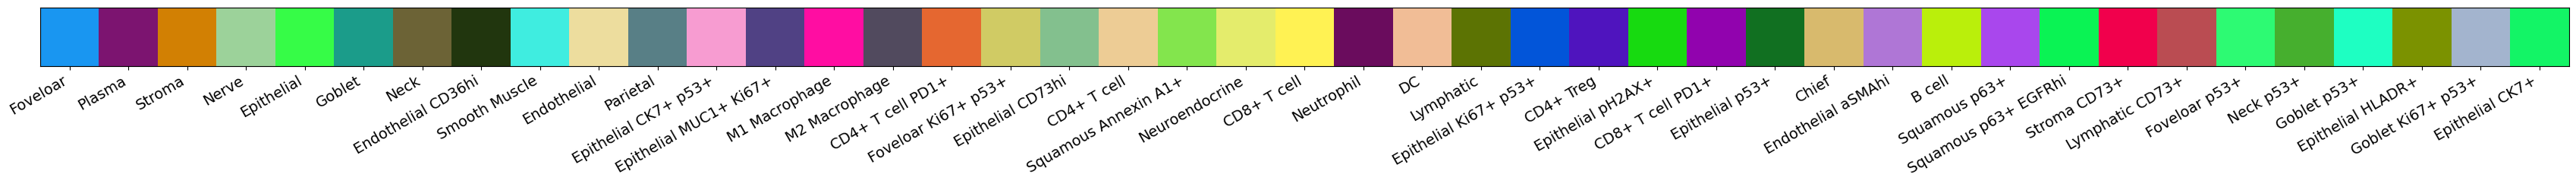

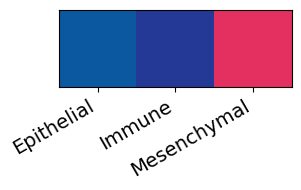

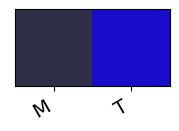

In [7]:
# provide a list with names colors are mapped on (usually cell types, categories or neighborhoods)
cell_names = df["Cell Type"].unique()
major_names = df["Major Cell Cat"].unique()
diagnosis_names = df['consensus diagnosis'].unique()
# provide a list of colors (same length as names list) or generate a random collection of colors
cell_colors = generate_random_colors(n = len(cell_names))
major_colors = generate_random_colors(n = len(major_names))
diagnosis_colors = generate_random_colors(n = len(diagnosis_names))

# combine both lists into a dictionary 
color_dic_cells = assign_colors(cell_names, cell_colors)
color_dic_major = assign_colors(major_names, major_colors)
color_dic_diagnosis = assign_colors(diagnosis_names, diagnosis_colors)

## 2.2) Generate visualizations

**How does the function work:**

This is a Python function that generates a stacked bar plot of a given dataset. The function takes in several arguments including the data, column names for categorical variables, a grouping variable, a list of cells to plot, a directory to save the plot, and various plot customization options.

The function starts by checking if the data needs to be normalized based on a boolean parameter "norm". If "norm" is True, then the percentage of each cell type in the dataset is calculated based on the given grouping variable. If "norm" is False, the percentage is calculated across the entire dataset.

The function then pivots the resulting frequency table to create a tidy dataframe that can be used to generate the stacked bar plot. The function allows for customization of the order of columns and rows in the plot, as well as the color palette used.

Finally, the function generates the plot using the matplotlib library and saves it to a file if a save_name argument is provided. The function returns the resulting pivoted dataframe and the column order for the plot.

**What is the biological meaning of this analysis:**

The analysis shows a stacked bargraph for each specified group. Sections within the graph represent the percentage of cells that is present in this group. The user can choose to group data by different categorial variables (e.g. a clinical condition, a treatment). Percentages can be calculated for broader groups (what is the percentage of immune cells?) or single cell types (what is the percentage of CD4+ T cells).

In [8]:
# Arguments for stacked bar plot:

data = df # data frame to use 

per_cat = "Major Cell Cat" # column containing the categories that are used to fill the bar plot

grouping = 'consensus diagnosis' # column containing a grouping variable (usually a condition or cell group)

norm = True

save_name = 'Major_subConsensus'

sub_col= 'Cell Type'

name_cat = 'Cell Type'

fig_sizing = (8,4) # numeric value to modify the figure size 

pal_color = color_dic_major # color dictionary 

remove_leg=False # removes legend if needed

cell_list = df["Major Cell Cat"].unique()

/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:78: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


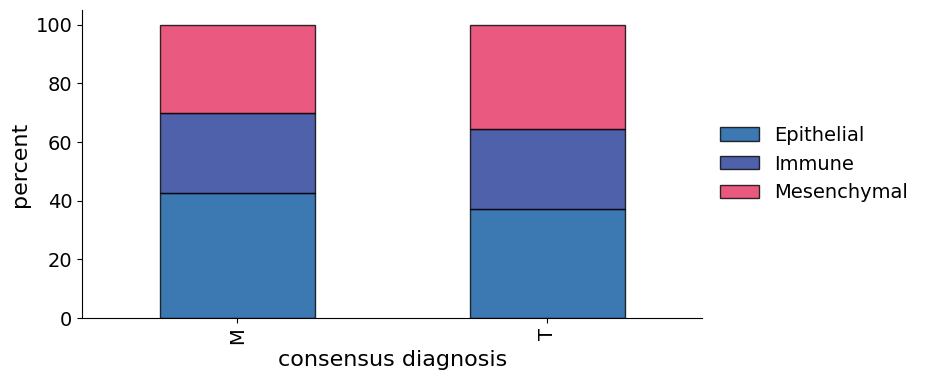

In [9]:
####### Stacked Bar Plot
# Shows percentage of category per group. For example: major cell types per diagnosis 
ab = stacked_bar_plot(data = df, \
                      per_cat = per_cat, \
                      grouping = grouping, \
                      output_dir = output_dir, \
                      sub_col= None, \
                      cell_list = cell_list,\
                      norm=False, \
                      fig_sizing=fig_sizing, \
                      name_cat = per_cat, \
                      col_order=None, \
                      save_name= "stacked_bar", \
                      pal_color=pal_color) 

**How does the function work:**

The swarm_box function takes in several parameters and returns a plot object. The purpose of this function is to create a box plot and swarm plot from the given data.

The function first checks if norm is True. If it is True, it subsets the data and computes the unique values of a given category column to get the percentage of cell type. If norm is False, it copies the entire data. The function then casts the category column to categorical type.

Next, the function computes the percentage of each category column by group and replicate. It converts column names to string type and resets the index. The function adds grouping and replicate to immune_list and subsets the data. It then melts the data frame and renames columns.

If col_in is not None, the function subsets melt_per_plot to include only those values. Otherwise, it does nothing. The function then orders the data by the average percentage of each category column.

If h_order is None, the function uses the unique values of the grouping column as the order. If pal_color is None, the function creates a figure with box plot and swarm plot for each category column or grouping column based on flip value.

If flip is True, the function creates a box plot with given parameters and a swarm plot with given parameters for grouping column. The function sets the transparency of box plot patches. If save_name is not None, the function saves the figure as a PNG file with given parameters.

In summary, the swarm_box function creates a box plot and swarm plot from the given data and returns a plot object. It has several parameters that allow for customization of the plot.

**What is the biological meaning of this analysis:**

In [21]:
# Arguments for swarm boxplot:

data = df # data frame to use 

grouping = 'consensus diagnosis' # column containing a grouping variable (usually a condition or cell group)

sub_col = 'Cell Type'

sub_list = ['CD4+ Treg', "B"]

replicate_column = "unique_region"

output_dir = output_dir

norm = False

per_cat = "Major Cell Cat"

fig_sizing=(8,4) # numeric value to modify the figure size 

save_name = 'Major_subConsensus'

pal_color = color_dic_diagnosis # color dictionary 

h_order=None

flip=True

/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:157: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:174: FutureWarning: Passing `palette` without assigning `hue` is deprecated.


<Figure size 800x400 with 0 Axes>

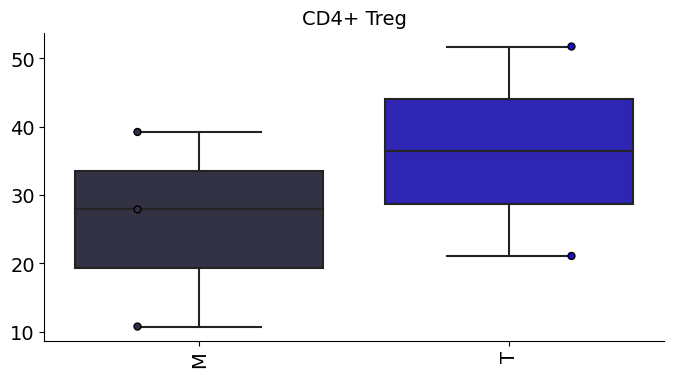

In [22]:
melt_per_plot = swarm_box(data = data, 
                          grouping = grouping, 
                          replicate = replicate_column, 
                          sub_col = sub_col, 
                          sub_list = sub_list, 
                          per_cat = per_cat, 
                          norm=norm,
                          figure_sizing= fig_sizing, 
                          save_name=save_name, 
                          h_order=h_order, 
                          pal_color=pal_color, 
                          flip=flip,
                          output_dir = output_dir)

**How does the function work:**

This Python function calculates the Shannon Diversity of cell types within a sample and performs ANOVA analysis on the results. The function takes in several parameters, including the input data (data1), a list of subgroups within the data (sub_l), a grouping variable (group_com), a category variable (per_categ), a replicate variable (rep), a sub-column variable (sub_column), and a coloring variable (coloring). Other parameters include an output directory (output_dir), a normalization option (normalize), a save option (save), an ordering variable (ordering), and a figure size variable (fig_size).

First, the function calculates the Shannon Diversity using the per_only1() function on the input data and the other parameters passed to the function. It then aggregates the results by replicate and grouping variable and calculates the Shannon Diversity. The results are saved in a Pandas DataFrame (res) with the Shannon Diversity column multiplied by -1.

Next, the function performs ANOVA analysis on the results using the f_oneway() function from the scipy.stats module. The results are saved in the test_results variable. If the test results are significant (p-value < 0.05), the function performs pairwise Tukey's HSD post-hoc analysis using the pairwise_tukeyhsd() function from the statsmodels.stats.multicomp module. The results are saved in a Pandas DataFrame (table1) and plotted using a heatmap with the sns.heatmap() function from the seaborn module.

Finally, the function plots the results using a swarmplot and boxplot with the sns.swarmplot() and sns.boxplot() functions from the seaborn module. The plot is customized with various parameters, including the coloring variable, ordering variable, and fig_size variable. If the save option is enabled, the plot is saved in the output directory. The function returns three variables: the Shannon Diversity data (tt), the ANOVA test results (test_results), and the Tukey's HSD results (table1).

**Further information on per_only1 function:** 

The per_only1 function is a helper function that takes in a pandas DataFrame data, and several other arguments including grouping, replicate, sub_col, sub_list, per_cat, and norm.

The function first filters the DataFrame data based on the values in sub_col column that are in sub_list, and then calculates the percentage of each unique value in the per_cat column for the filtered DataFrame.

If norm is True, the function normalizes the percentage values by dividing them by the total count of each unique value in the per_cat column. Otherwise, it calculates the percentage without normalization.

The resulting DataFrame contains the grouping column, replicate column, per_cat column, and a column specifying the percentage. The grouping and replicate columns are specified by the arguments passed to the function, and the per_cat column is the column containing the cell types or categories of interest.

The melt_per_plot DataFrame returned by the function can be used for plotting or further analysis. An example of the output would be the percentage of CD4+ T cells in a unique region E08 assigned to community xxx.

**What is the biological meaning of this analysis:**

Estimates the diversity within a given community. The figure shows the Shannon Diversity Index for the specified groups as boxplot showing the replicates as individual datapoints. Typical replicates are the unique regions within the respective group. 

A higher score indicates a higher degree of diversity within the analyzed group. CAVE: rare cell types might be overrepresented in statistical evaluation. 

In [25]:
# Arguments for Shannon diversity plot:

data = df # input data frame 

sub_l = ['CD4+ Treg', "B"]

group_com = 'consensus diagnosis' # column containing a grouping variable (usually a condition or cell group)

per_categ = "Major Cell Cat"

rep = "unique_region" # replicate column (usually the unique regions per sample)

sub_column = 'Cell Type'

normalize = False

save = True # logical value to decide if the generated plot should be saved 

coloring = color_dic_diagnosis # color dictionary 

fig_size = 8 # numeric value to modify the figure size 

ordering = None # optional list to specify the plotting order

output_dir = output_dir # directory to save output

/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:266: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:274: FutureWarning: Passing `palette` without assigning `hue` is deprecated.


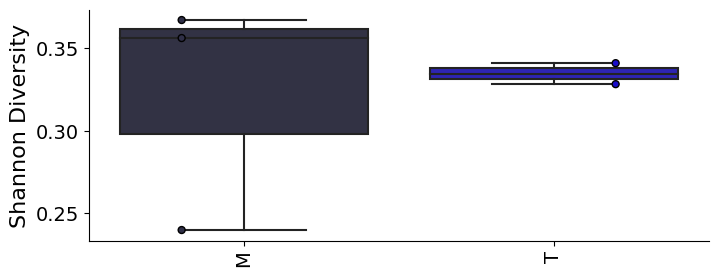

In [26]:
####### Swarm Boxplot of Shannon diversity score
result, pval, tukey_tab = Shan_div(data = data, \
                                   sub_l = sub_l, \
                                   group_com = group_com, \
                                   per_categ = per_categ, \
                                   rep = rep, \
                                   sub_column=sub_column, \
                                   normalize=normalize, \
                                   save=save, \
                                   coloring= coloring, \
                                   fig_size=fig_size, \
                                   ordering=ordering, \
                                   output_dir = output_dir)

**How does the function work:**

**corr_cell**

This function performs a correlation analysis on a dataset and plots the results. The function takes several arguments:

- data: the input data for the analysis
- sub_l2: a list of subcategories for grouping the data
- per_categ: the category for calculating the percentage
- group2: a grouping variable for the analysis
- repl: a variable for replicates
- sub_column: the name of the column that contains subcategory data
- cell: the cell type for the analysis
- output_dir: the directory where the output plot will be saved
- save_name: the name for the output plot
- thres: the threshold for correlation analysis
- normed: whether to normalize the data (default is True)
- cell2: an optional second cell type for the analysis

The function first calls the per_only1 function on the input data to calculate the percentage based on the specified categories, subcategories, and replicates. It then creates a pivot table from the resulting data, calculates the correlation matrix, and subsets the matrix based on the specified threshold and cell type.

The function then plots the correlation matrix using the cor_subplot function and saves the plot to the specified directory with the specified name. Finally, the function returns two sets of pairs: all pairs and pairs for the specified cell type.

**cor_plot**

The cor_plot function takes in a Pandas DataFrame data, and several parameters to create a heatmap and scatter plot of the correlation matrix between the columns in the DataFrame. The function can take in two grouping variables group1 and group2 and creates a heatmap of the correlation matrix between the percentage of each variable in per_cat. The sub_col parameter specifies the column to filter the data by the values in sub_list. If norm is True, the percentage values are normalized by the sum of the values in the column sub_col. If count is True, the count of each variable is used instead of the percentage. If plot_scatter is True, a scatter plot matrix is created with a regression line for each pair of variables.

If group2 is not specified, the correlation matrix is created between the percentage of each variable in per_cat for each unique value in group1. If count is True, the count of each variable is used instead of the percentage.

The function returns the correlation matrix cor_mat and the DataFrame used to create the heatmap and scatter plot mp.

**cor_subplot**

The function cor_subplot takes three required arguments mp, sub_list, and output_dir and one optional argument save_name.

The mp argument is a pandas DataFrame which contains data to be plotted in a correlation subplot. sub_list is a list of column names of the mp DataFrame for which the correlation matrix will be plotted. output_dir is a string which specifies the output directory where the figure will be saved.

The function first selects the columns specified in the sub_list argument from the mp DataFrame and creates a pairwise scatterplot matrix using Seaborn's pairplot function with kernel density estimates on the diagonal and linear regression fits on the lower triangle. The corner=True argument sets the diagonal axes to be drawn only once.

If save_name is not None, the function saves the figure to a file in the specified output_dir with the name save_name+'_corrplot.png'. The saved figure is in PNG format with a DPI of 300 and transparent background. The bbox_inches='tight' argument adjusts the figure size to remove any whitespace padding.
    
**What is the biological meaning of this analysis:**
    

In [27]:
# Arguments correlation analysis: 

# corr_cell
data = df # input data frame

sub_l = ['CD4+ Treg', 'B']

group_com = "consensus diagnosis" 

per_categ = "Major Cell Cat"

rep = "unique_region"

sub_column = "Cell Type"

normed = True

save = True

coloring = None

fig_size = 8

thres = 0.7

ordering = None

output_dir = output_dir

cell = 'CD4+ Treg'
cell2 = 'Endothelial CD36hi'

sub_column = 'Major Cell Cat'

group2 = 'Sub diagnosis'

save_name = "cell1_cell2_cor"

# cor_plot
group1 = 'Major Cell Cat'

per_cat = 'Cell Type'

sub_col = 'Major Cell Cat'

sub_list = ['CD4+ Treg', 'B']

norm = True

count = False

plot_scatter = False

# Prepare subplot 
cell_type = 'Epithelial CK7+'

In [28]:
####### Correlation Analysis 

all_pair, sub_pair = corr_cell(data = df, \
                               sub_l2 = sub_l, \
                               per_categ = per_categ, \
                               group2 = group2, \
                               repl = rep, \
                               sub_column = sub_column, \
                               cell = cell, \
                               normed = normed, \
                               thres = thres, \
                               cell2 = cell2,
                               output_dir = output_dir, 
                               save_name = save_name)

cor_mat, mp = cor_plot(data = df, \
                       group1 = group1, \
                       per_cat = per_cat, \
                       sub_col= sub_col, \
                       sub_list= sub_l, \
                       norm=True, \
                       count=False, \
                       plot_scatter=False)


piar1 = all_pair.loc[all_pair['col1']==cell_type]
piar2 = all_pair.loc[all_pair['col2']==cell_type]
piar=pd.concat([piar1,piar2])
piar

pair_list = list(set(list(piar['col1'].unique())+list(piar['col2'].unique())))
pair_list

sl = pair_list

cor_subplot(mp=mp, \
            sub_list=sl, \
            output_dir = output_dir)

/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:1094: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


ValueError: cannot insert unique_region, already exists

# 3) Neighborhood and Community Analysis 

## 3.1) Neighborhood analysis 

**How does the function work:**

I apologize for the confusion. You are correct, the third bar plot also shows stacked bars normalized to 100 percent.

Here's an updated description of the function:

This Python function is designed to visualize the composition of different cell types in a given dataset. The input to the function is a pandas dataframe (df) containing information about the samples and their cell types. The sample_column argument specifies the name of the column in the dataframe that contains sample identifiers, and cell_type_column specifies the name of the column containing the cell type information.

If an output_dir is specified, the function generates three different bar plots of the cell type composition. The first plot shows the absolute count of each cell type for each sample, where the bars are stacked. The second plot shows the percentage of each cell type in each sample. The third plot shows the absolute count of each cell type for each sample, where the bars are stacked and normalized to 100 percent.

All three plots are saved as PNG files in the specified output_dir.

If no output_dir is specified, the function prints a message saying that no output directory has been defined.
    
**What is the biological meaning of this analysis:**

These visualizations are ment to provide a general overview of the global composition of each individual sample. The function provides three different variations of bar graphs.
1. Stacked bar graph showing the absolut count of the category 
2. Bar graph that shows the counts per category side by side 
3. Stacked bar graph showing the percentage of each category per sample
    

In [29]:
# Arguments for composition visualization function:

data = df # data frame to use

sample_column = "sample" # column that specifies the sample

cell_type_column = 'Cell Type' # column that specifies cell types - other variables will be accepted as well

output_dir = output_dir # directory to save output 

/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:353: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


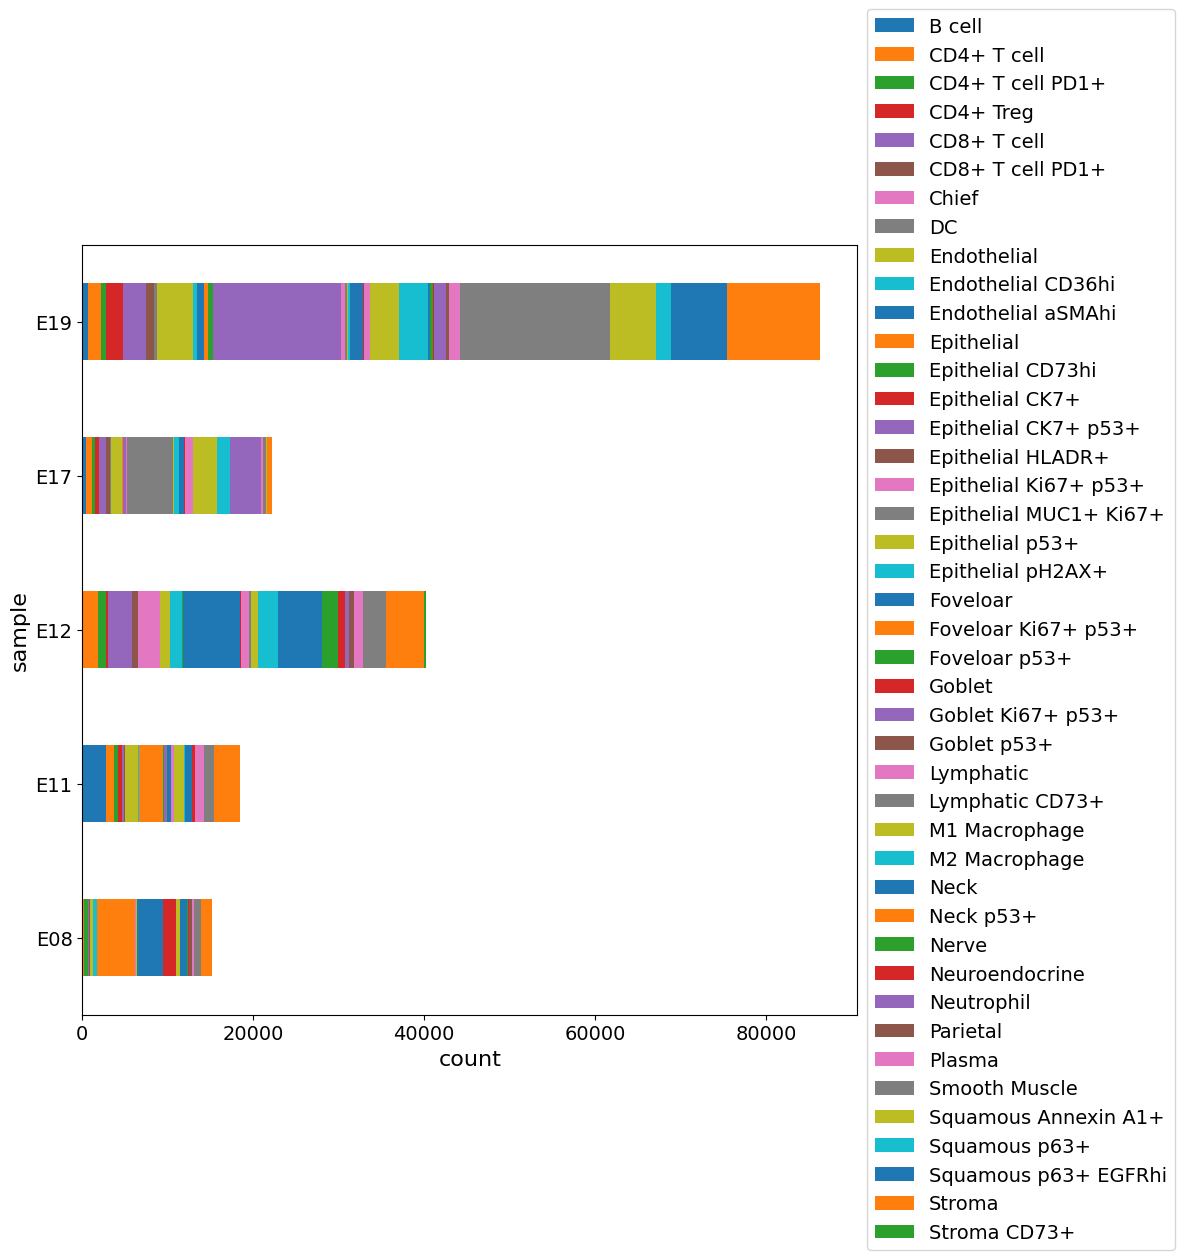

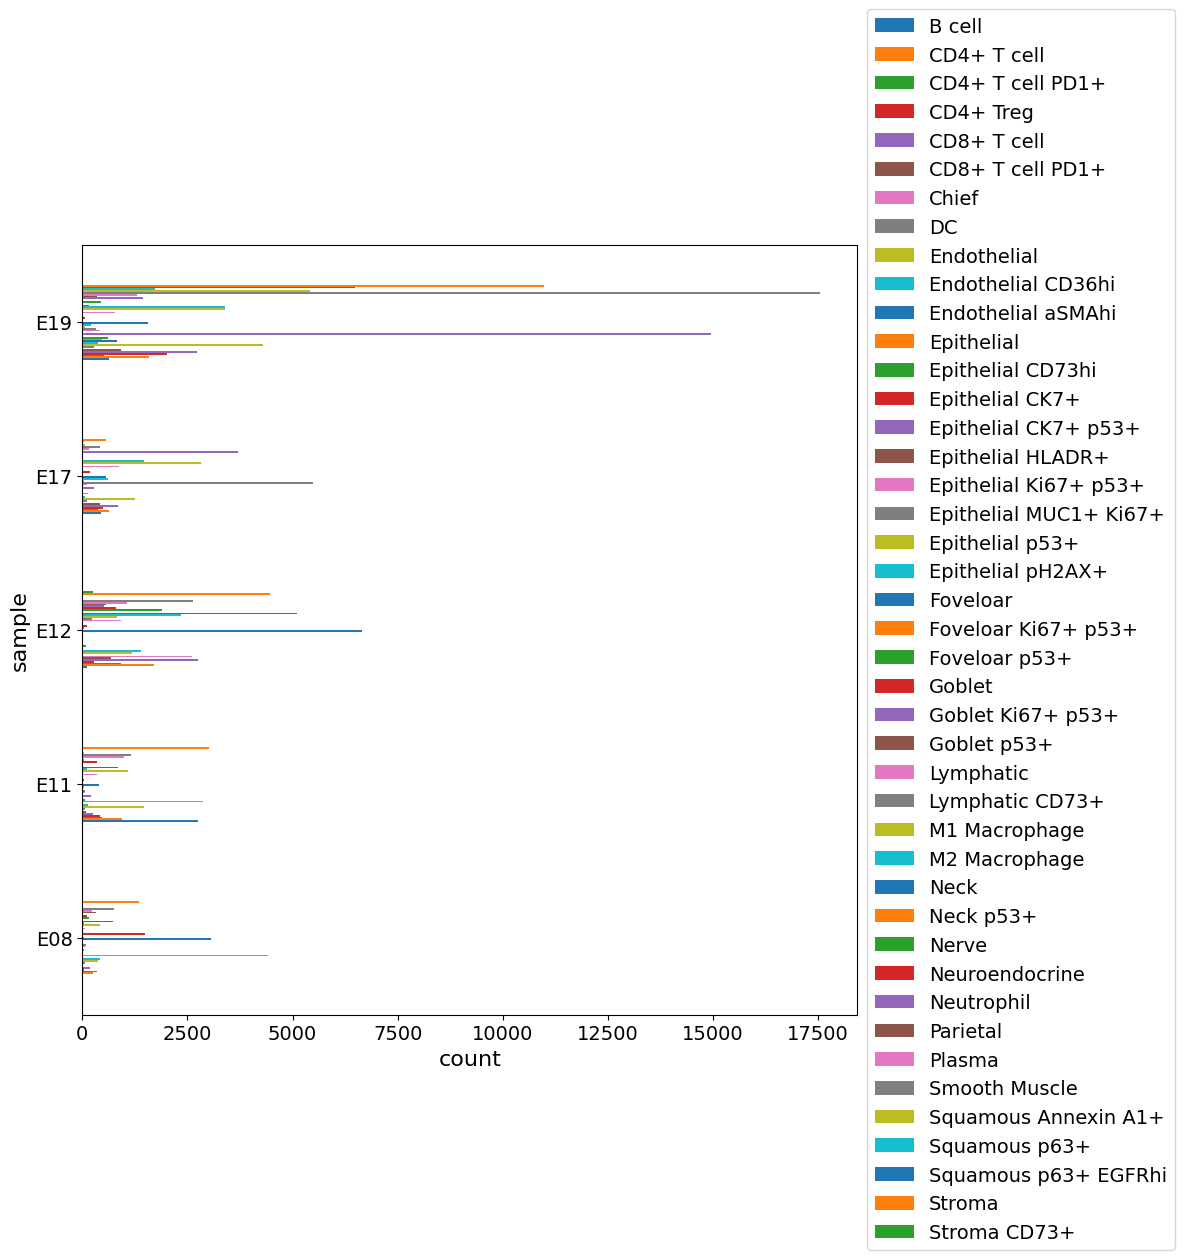

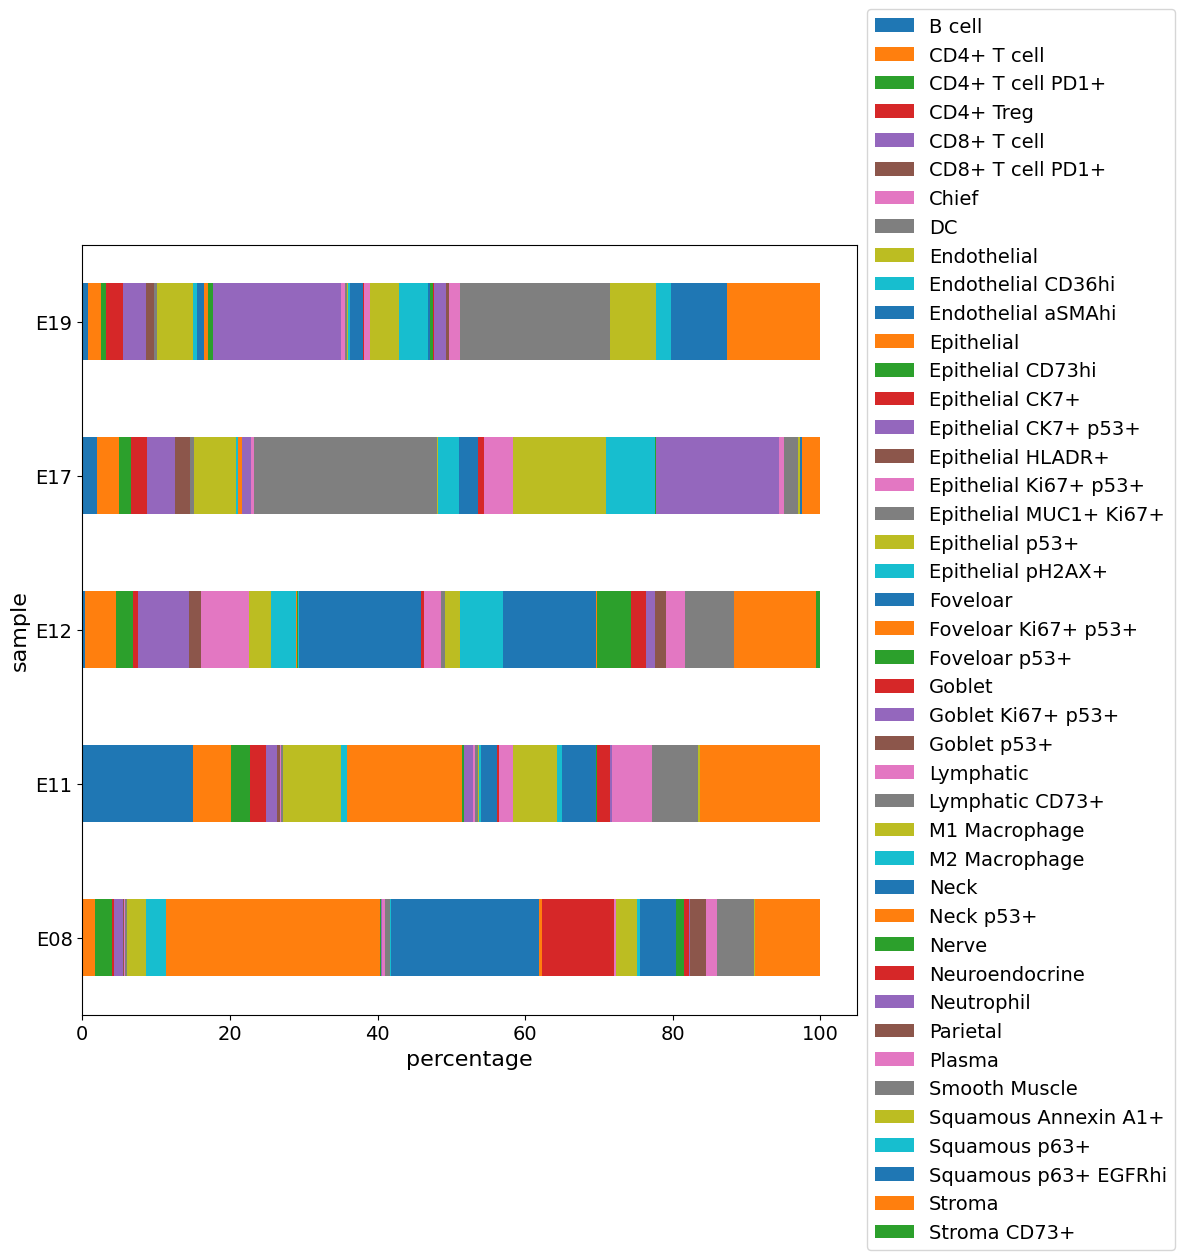

In [30]:
####### Visulize overall cell type composition
cell_type_composition_vis(data = df, \
                          sample_column = sample_column, \
                          cell_type_column = cell_type_column, \
                          output_dir = output_dir)

**How does the function work:**
    
**What is the biological meaning of this analysis:**

Allocate every cell to a broader group based on its spatial context. Cellular Neighborhoods (CN) can be understood as common groups of cells which are shared by multiple regions (e.g. the "generic tumor neighborhood" is found in every tumor of dataset xxx). This code assings the neighborhoods, plots a spatial plot colored by neighborhoods and generates a heatmap that illustrates which celltype is found in the generated neighborhoods. 

In [31]:
# Arguments for neighborhood analysis:

X = "x" # column containing the x coordinates 

Y = "y" # column containing the y coordinates 

reg = "unique_region" # column containg the unique regions 

cluster_col = "Cell Type" # column which is used for clustering - typically cell types (to generate cellular neighborhoods)

ks = [20, 30, 35] # k=n means it collects n nearest neighbors for each center cell

output_dir = output_dir

k = 35

n_neighborhoods = 30 # number of generated neighborhoods - value should be biologically meaningful 

save_to_csv= True

plot_specific_neighborhoods = [2,4]

/var/folders/6d/0x48qjh15rx9851lpdwvrxvc0000gn/T/ipykernel_91460/3374599978.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.


Starting: 1/5 : E08_reg006
Finishing: 1/5 : E08_reg006 0.14684295654296875 0.14733099937438965
Starting: 2/5 : E11_reg002
Finishing: 2/5 : E11_reg002 0.17189502716064453 0.33696508407592773
Starting: 5/5 : E12_reg003
Finishing: 5/5 : E12_reg003 0.3943140506744385 0.7353417873382568
Starting: 3/5 : E17_reg005
Finishing: 3/5 : E17_reg005 0.19674396514892578 0.9411239624023438
Starting: 4/5 : E19_reg003
Finishing: 4/5 : E19_reg003 0.8163788318634033 1.7630290985107422


/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:403: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:405: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:403: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:405: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:403: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahk

E08_reg006


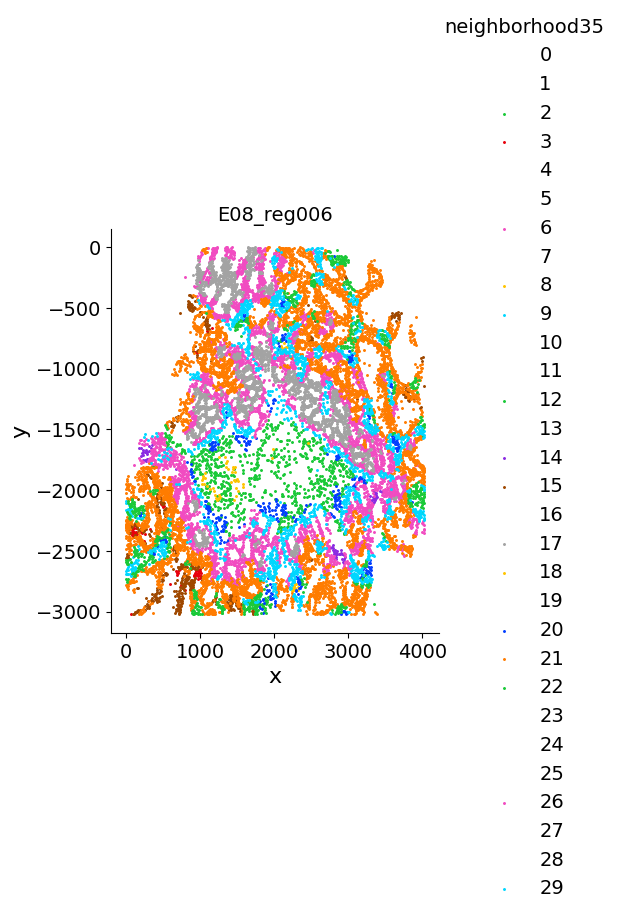

E11_reg002


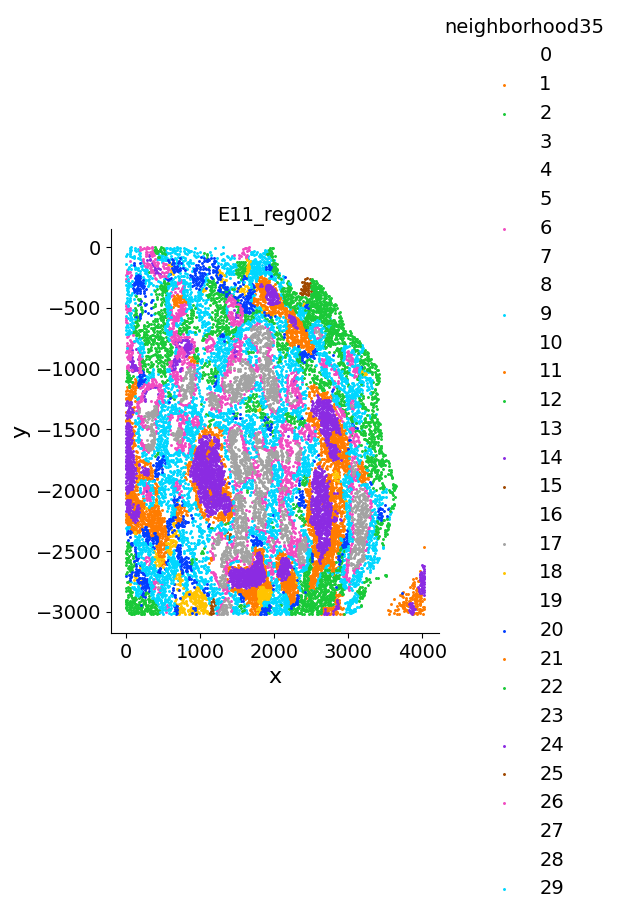

E17_reg005


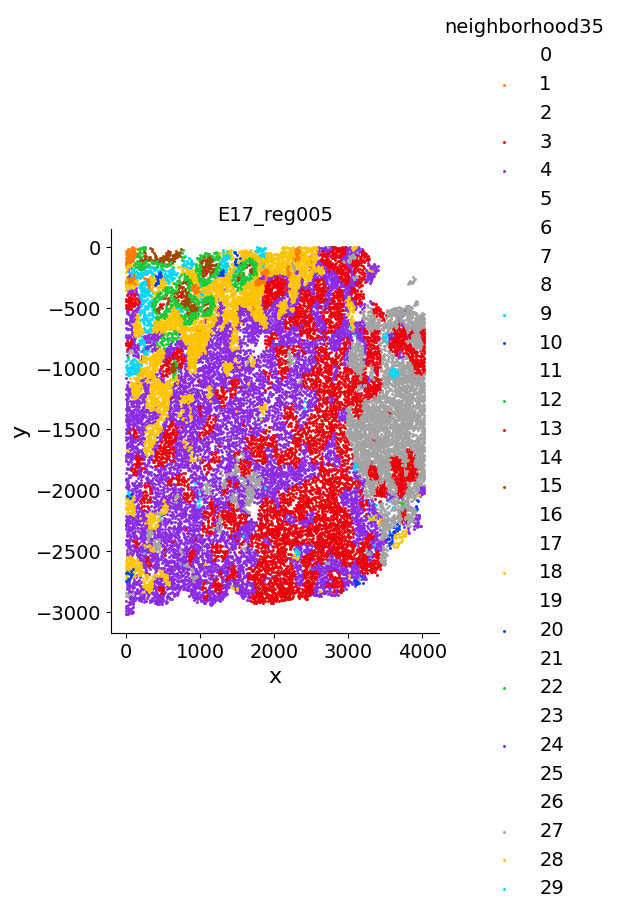

E19_reg003


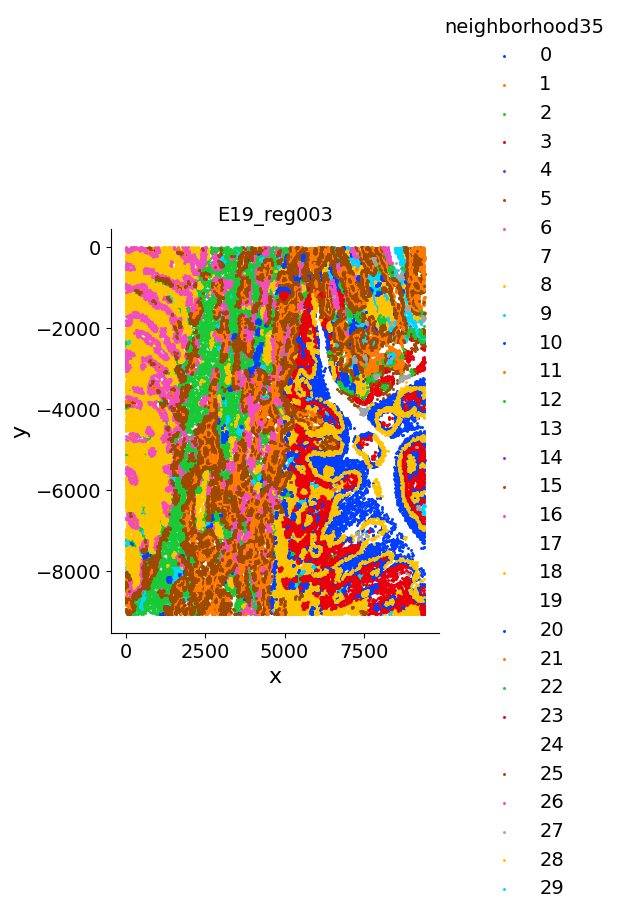

E12_reg003


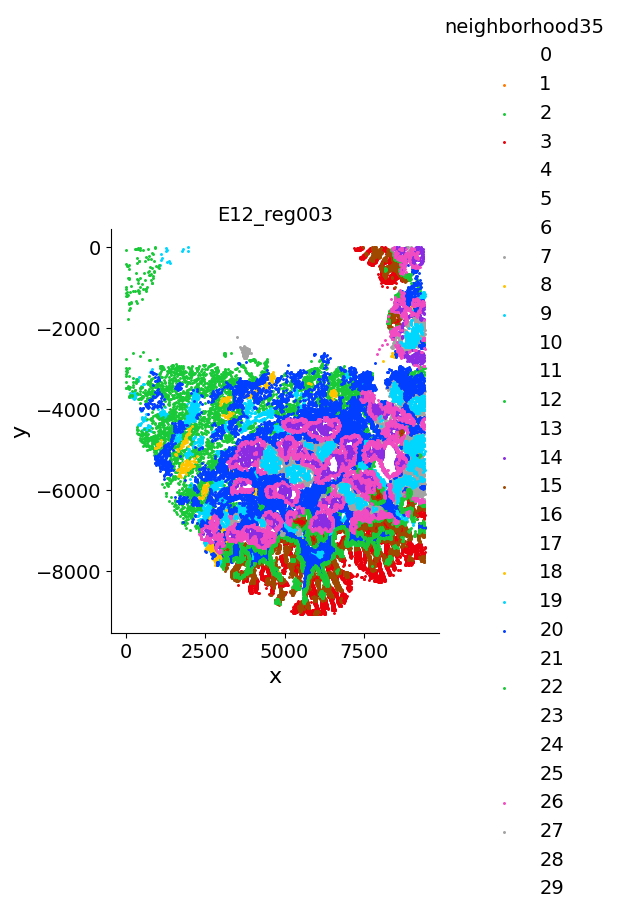

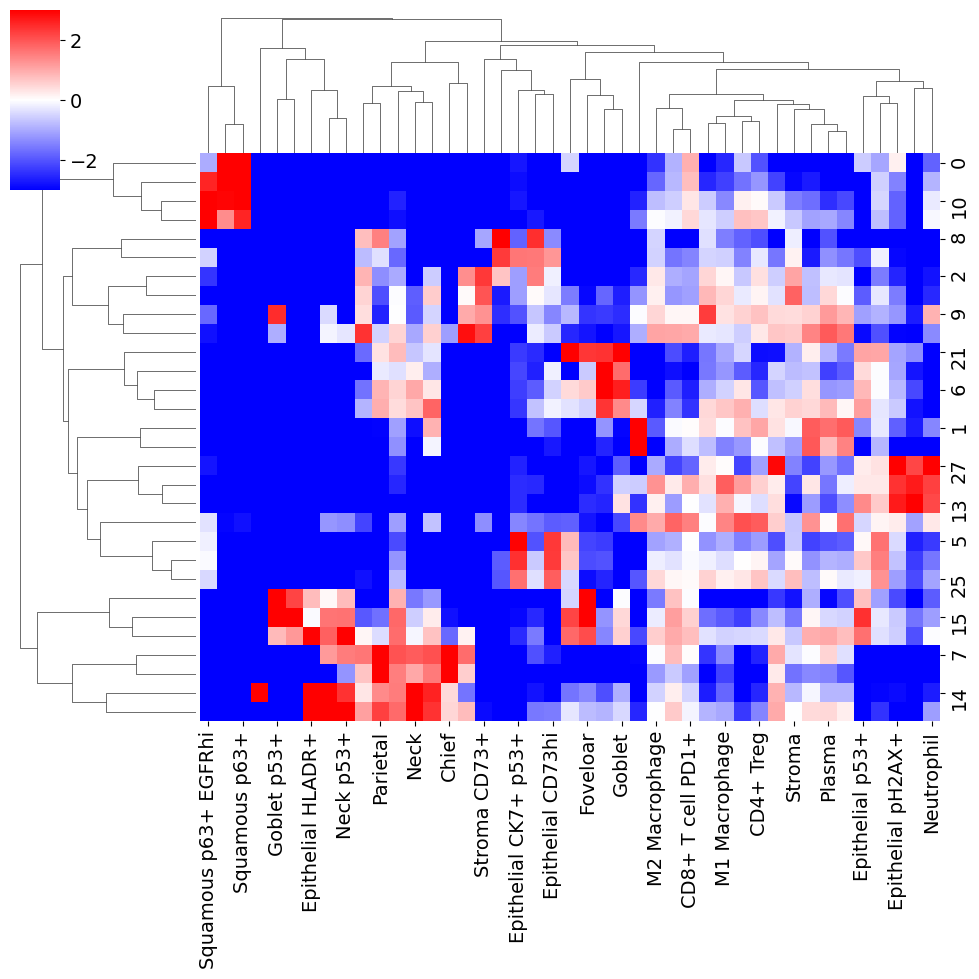

In [32]:
####### Neighborhood analysis 
df2 = pd.concat([df,pd.get_dummies(df[cluster_col])],1)
sum_cols = df2[cluster_col].unique()
values = df2[sum_cols].values

k_centroids = {}

cells_df = neighborhood_analysis(data = df2, \
                                 X = X, \
                                 Y = Y, \
                                 reg = reg, \
                                 cluster_col = cluster_col, \
                                 ks = ks, \
                                 output_dir = output_dir, \
                                 k = k, \
                                 n_neighborhoods = n_neighborhoods, \
                                 save_to_csv= True, \
                                 plot_specific_neighborhoods = [2,4], \
                                 values = values, \
                                 sum_cols = sum_cols)

## 3.2) Community Analysis 

**How does the function work:**
    
**What is the biological meaning of this analysis:**

This analysis is very similar to the neighborhood analysis but classifies even broader groups. Instead of cell types neighborhoods are used for
    

In [35]:
# Arguments for community analysis:

df = cells_df

X = X

Y = Y

reg = "unique_region"

cluster_col_commun = "neighborhood35"

ks_commun = [20] # k=n means it collects n nearest neighbors for each center cell

output_dir = output_dir

k_commun = 20

n_communities_commun = 20

plot_specific_community = [2,4,5]

values = values

sum_cols = sum_cols

Starting: 1/5 : E08_reg006
Finishing: 1/5 : E08_reg006 0.09108400344848633 0.09142017364501953
Starting: 2/5 : E11_reg002
Finishing: 2/5 : E11_reg002 0.10054802894592285 0.19825387001037598
Starting: 5/5 : E12_reg003
Finishing: 5/5 : E12_reg003 0.2637457847595215 0.46409082412719727
Starting: 3/5 : E17_reg005
Finishing: 3/5 : E17_reg005 0.11064291000366211 0.5794198513031006
Starting: 4/5 : E19_reg003
Finishing: 4/5 : E19_reg003 0.5700948238372803 1.1520748138427734


/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:879: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/Desktop/SAP/Functions_grouped/All_functions.py:881: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
/Users/timnoahkempchen/opt/anaconda3/envs/spatial_analysis_environment/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


E08_reg006


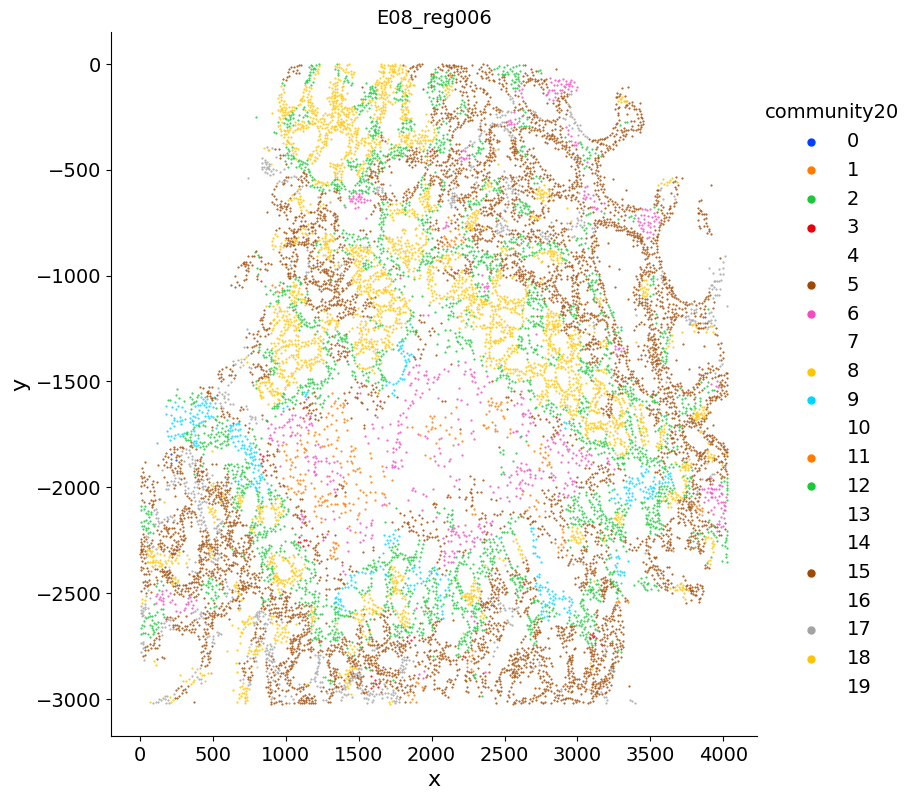

E11_reg002


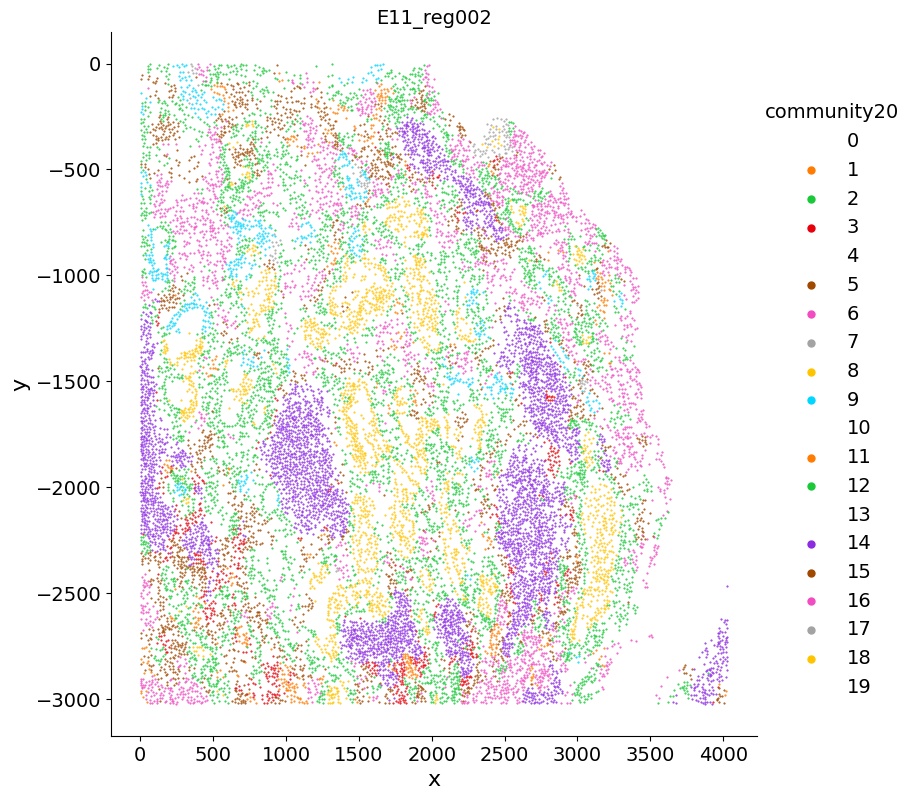

E17_reg005


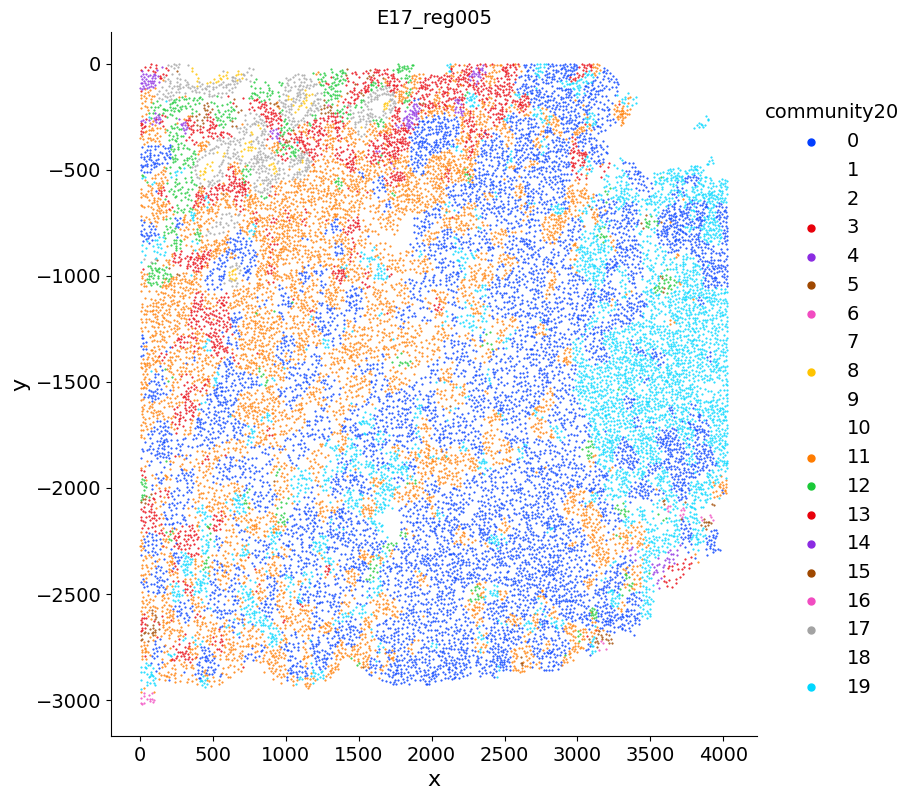

E19_reg003


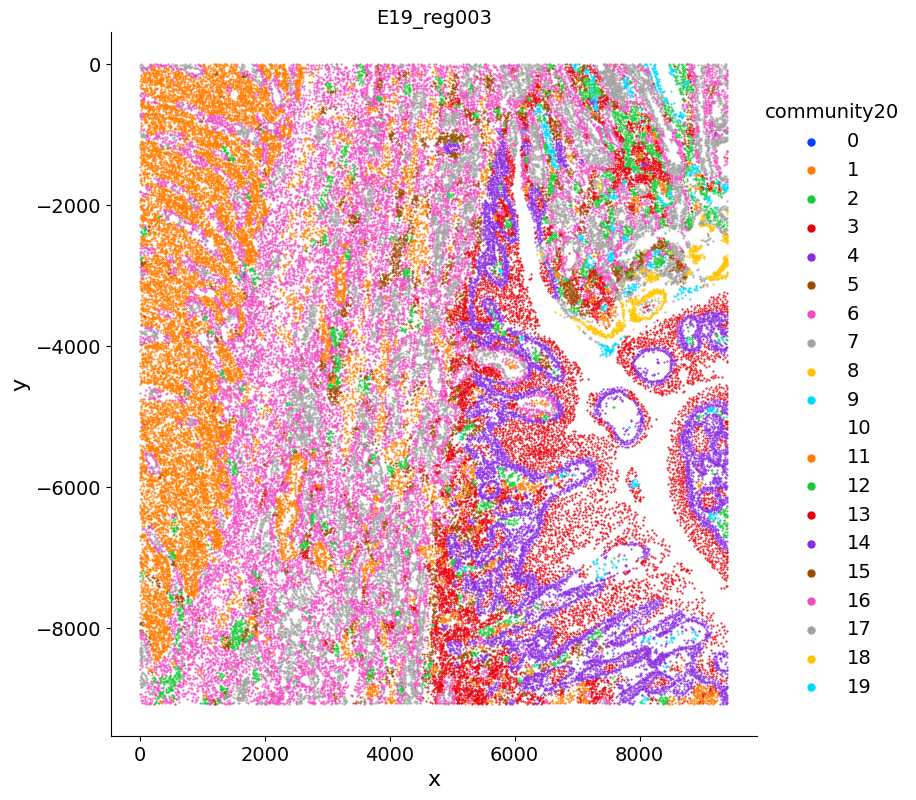

E12_reg003


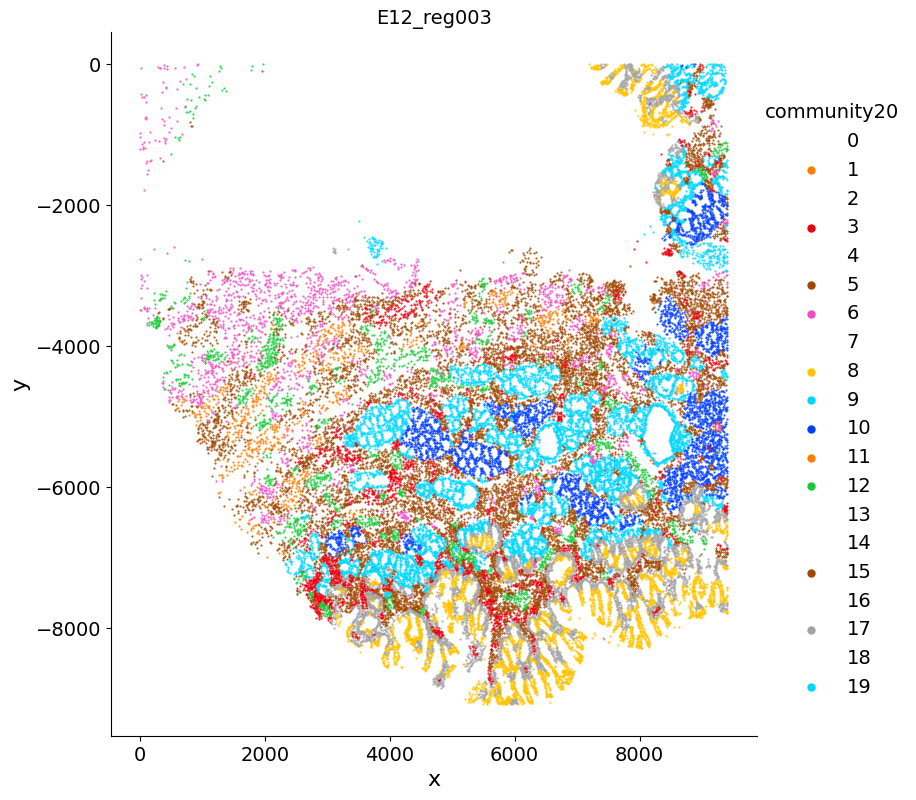

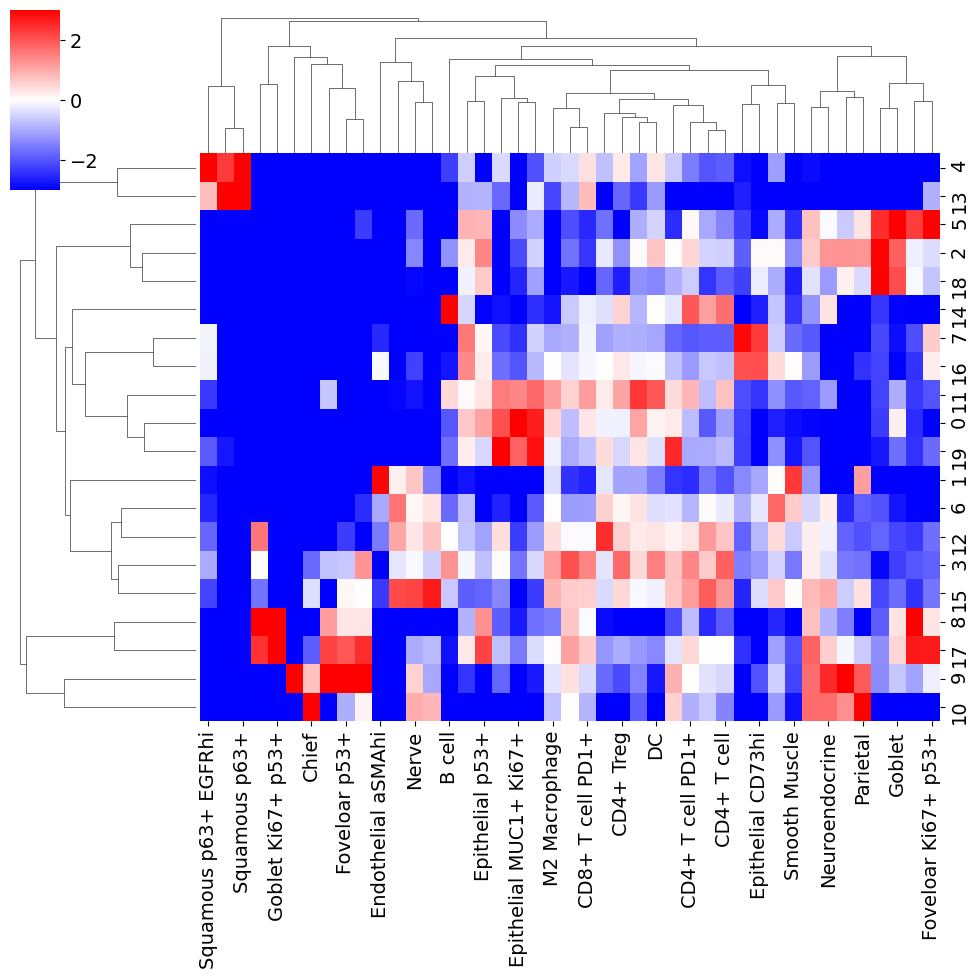

In [36]:
k_centroids = {}

cells_df2 = community_analysis(data = cells_df, \
                               X = X, \
                               Y = Y, \
                               reg = reg, \
                               cluster_col = cluster_col_commun, \
                               ks = ks_commun, \
                               output_dir = output_dir, \
                               k = k_commun, \
                               n_neighborhoods = n_communities_commun, \
                               plot_specific_community = [2,4,5], \
                               values = values, \
                               sum_cols = sum_cols)

# 4) Analysis dependent on neighborhood analysis 

## 4.1) Specify additional column names 

In [ ]:
####### Cell Type Differential Enrichment 
ID_component1 = 'sample'
ID_component2 = 'Block type'
neighborhood_col = 'neigh_name'
group_col = 'Core Type'
group_dict = {'Dysplasia':0, 'Adenocarcinoma':1, "Barrett's Metaplasia":2, "Squamous":3}
cell_type_col = 'Cell Type'

neighborhood_col_number = 'neigh_num'

## 4.2) Cell Type Differential Enrichment 

**How does the function work:**

**cell_types_de_helper**

The cell_types_de_helper function takes a pandas DataFrame (df), as well as several column names and dictionaries as inputs, and performs various data transformation operations on the input DataFrame to generate several outputs.

The function first reads in the input DataFrame df and generates a unique ID by concatenating two columns specified by the ID_component1 and ID_component2 inputs. It then creates a dictionary called neigh_num that maps each unique value in the neighborhood_col column of the input DataFrame to a unique integer index starting from 0. The function then creates a new column called group by mapping each value in the group_col column to its corresponding integer value from a dictionary called group_dict.

The function then creates a new dictionary called pat_dict that maps each unique value in the donor_tis column of the input DataFrame to a unique integer index starting from 0. The function assigns these integer indices to each patient in the donor_tis column, creating a new column called patients. The function then drops duplicates from the patients and group columns and creates a new dictionary called pat_to_gp that maps each patient to their corresponding group.

The function then groups the input DataFrame by patients and calculates the frequency of each value in the cell_type_col column for each patient, normalized by the total number of cells for that patient. The function stores the resulting DataFrame as ct_freq.

Finally, the function groups the input DataFrame by both patients and neigh_num, and calculates the frequency of each value in the cell_type_col column for each neighborhood and patient, normalized by the total number of cells for that patient and neighborhood. The function stores the resulting DataFrame as all_freqs.

The function returns several outputs, including the transformed input DataFrame (cells2), the ct_freq and all_freqs DataFrames, as well as the pat_to_gp and neigh_num dictionaries.

**cell_types_de**
This function performs differential enrichment analysis of cell types between different neighborhoods in a tissue.


The function takes in several inputs, including cell type frequencies, patient data, neighborhood data, and an output directory. The function first normalizes overall cell type frequencies and neighborhood-specific cell type frequencies, and then calculates differential enrichment for all cell subsets using linear regression. It creates a heatmap to visualize the changes in cell type frequencies across different neighborhoods, with asterisks indicating statistical significance (p < 0.05).

After correcting p-values for multiple testing, it generates a second heatmap that is sorted by the sum of absolute values of coefficients in each row and column. Finally, it saves the heatmap plot as a PNG file in the specified output directory and returns the sum of absolute values of coefficients in the sorted dataframe.

- ct_freq: a pandas DataFrame with cell type frequencies for all samples
- all_freqs: a pandas DataFrame with cell type frequencies and neighborhood information for all samples
- neighborhood_num: the name of the column in all_freqs that contains the neighborhood information
- nbs: a list of integers representing the neighborhoods to analyze
- patients: a list of patient IDs to include in the analysis
- group: a pandas Series with group information (0 or 1) for each sample
- cells: a list of cell type names to analyze
cells1: a list of cell type names with neighborhood-specific information to analyze
neigh_num: a dictionary mapping neighborhood numbers to names
output_dir: a string representing the output directory for the generated plots
The function then performs several steps:

Normalize the overall cell type frequencies and the neighborhood-specific cell type frequencies for the specified patient IDs using the normalize function.
For each neighborhood in nbs, concatenate the normalized neighborhood-specific cell type frequencies for the specified patient IDs into a design matrix with a constant, group 0 or 1, and the normalized overall cell type frequencies. Then, fit a linear regression model to the neighborhood-specific cell type frequencies, where the neighborhood-specific cell type frequencies are the outcome and the design matrix is the predictor.
Store the p-values and coefficients for the group coefficient in each linear regression model in a dictionary.
Correct the p-values for multiple testing (this step is currently missing in the code).
Create a heatmap of the coefficients for each cell type and neighborhood, using the sns.heatmap function.
Sort the rows and columns of the heatmap by the absolute sum of the coefficients across neighborhoods and cell types.
Add asterisks to the heatmap for any cell type and neighborhood combination where the p-value is less than 0.05.
Save the heatmap as a PNG file in the specified output directory.
Return the sum of the absolute values of the coefficients in the sorted heatmap.



    
**What is the biological meaning of this analysis:**
Identifies cell populations that statistical significantly differ between CNs
    

In [37]:
# Arguments for cell type differential enrichment analysis:

ID_component1 = 'sample'

ID_component2 = 'Block type'

neighborhood_col = 'neigh_name'

group_col = 'Core Type'

group_dict = {'Dysplasia':0, 'Adenocarcinoma':1, "Barrett's Metaplasia":2, "Squamous":3}

cell_type_col = 'Cell Type'

neighborhood_col_number = 'neigh_num'

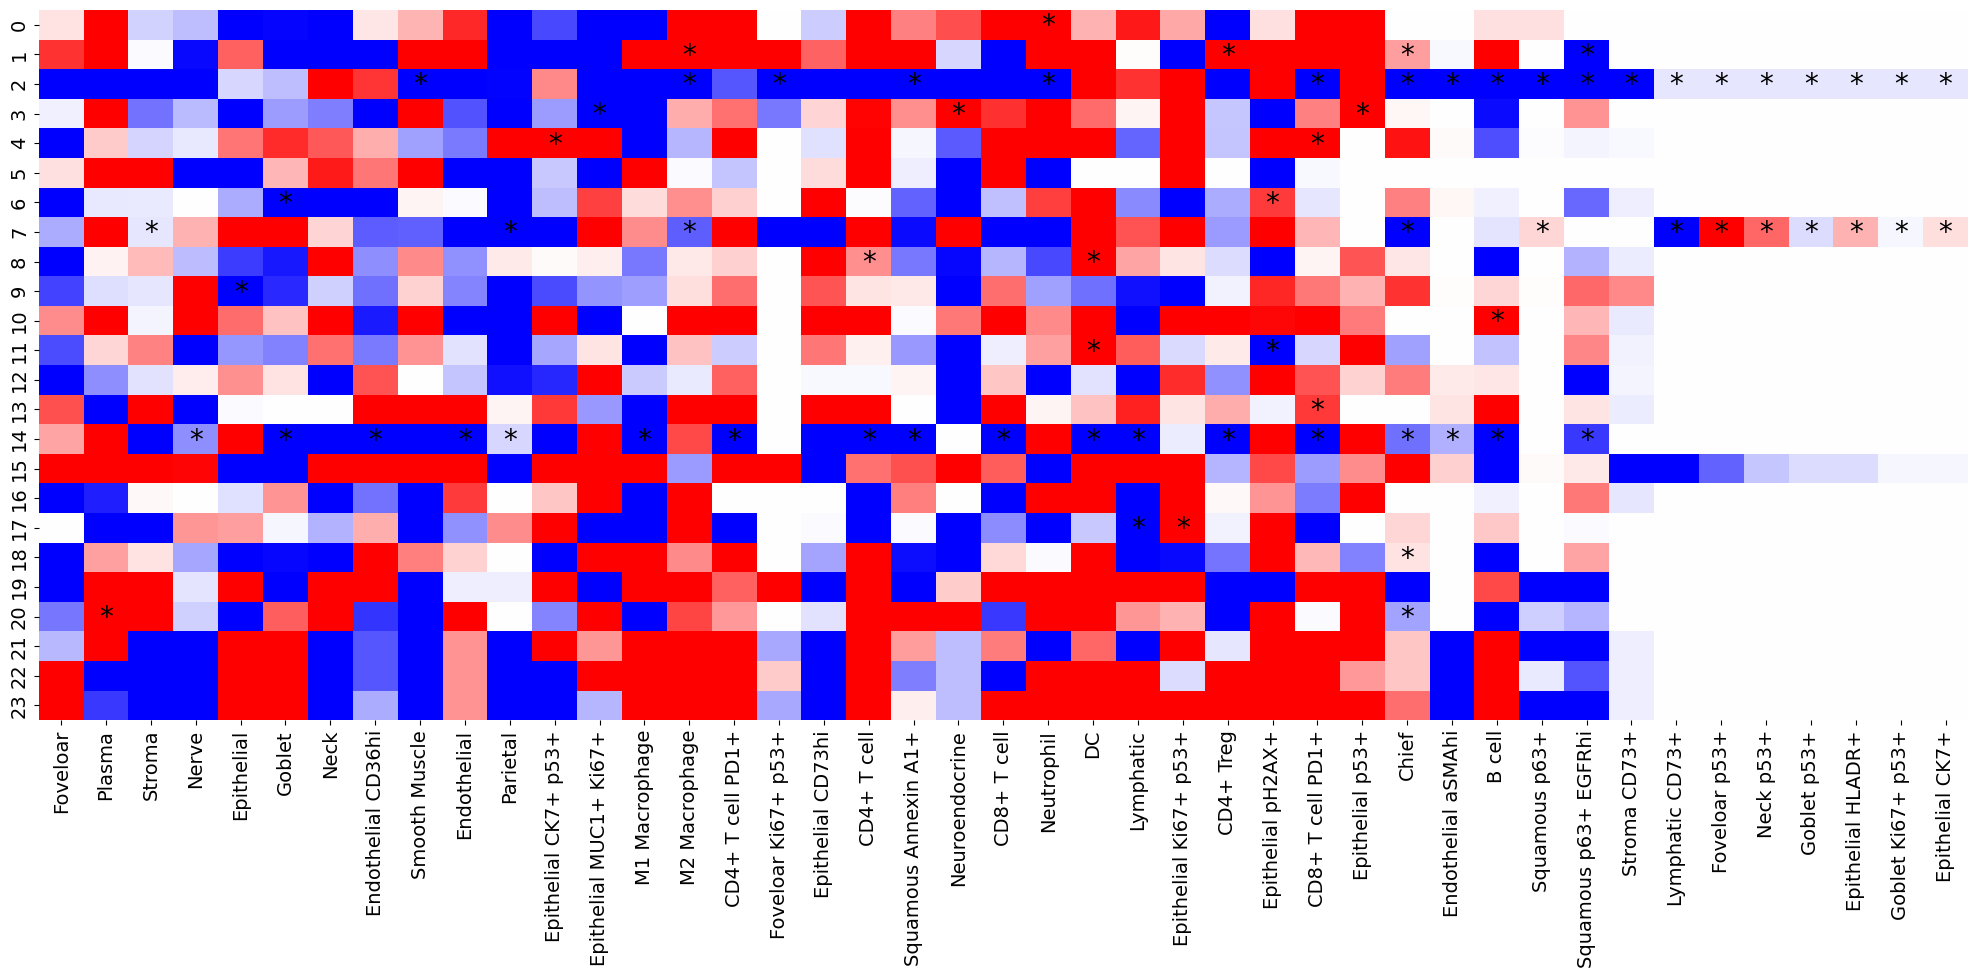

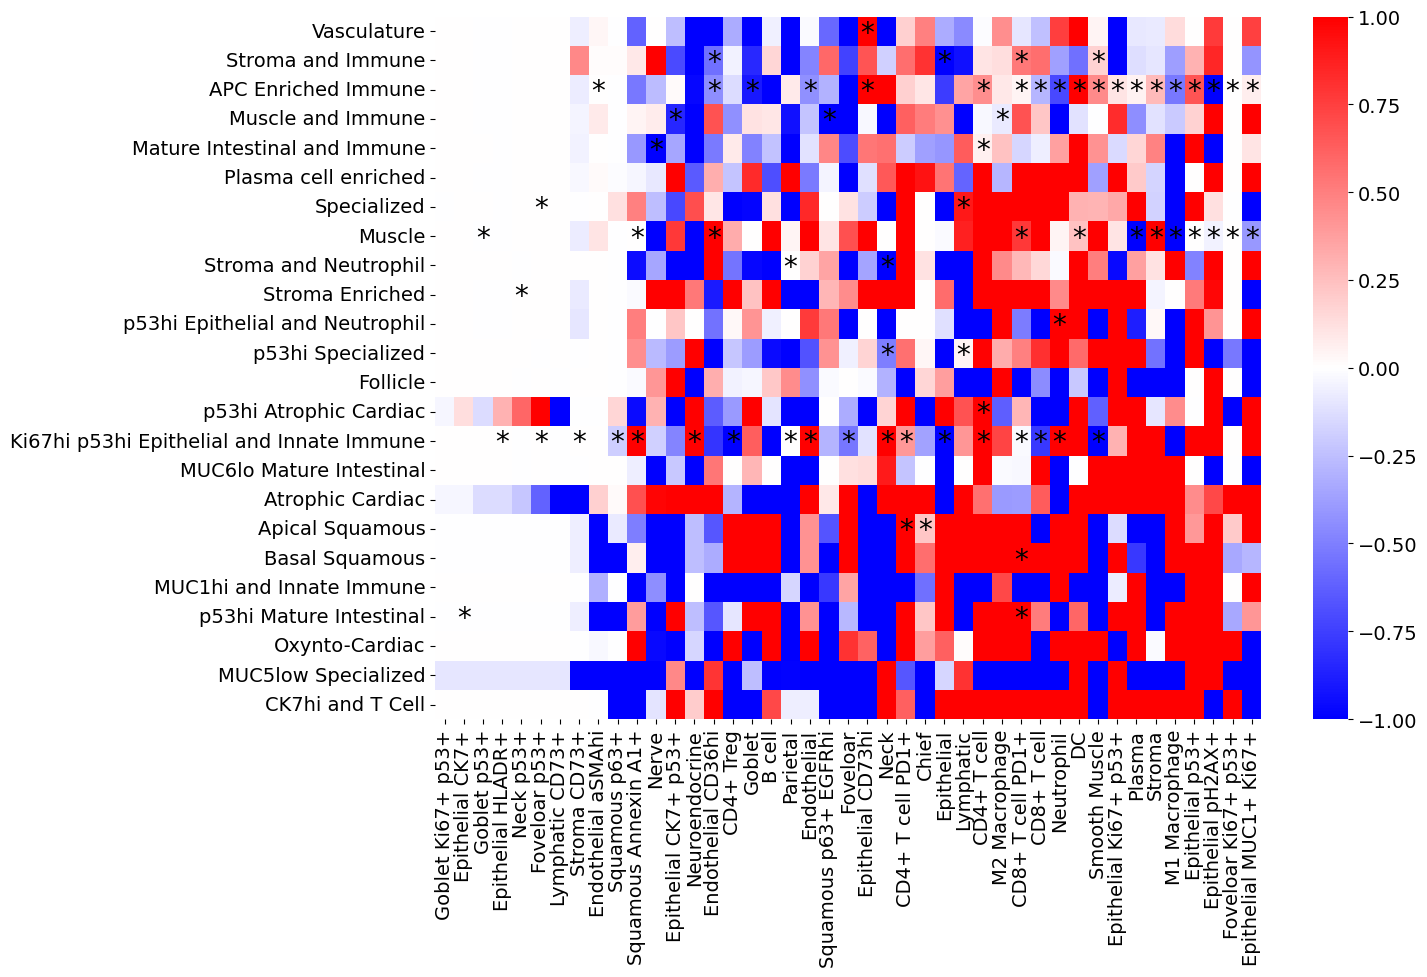

In [38]:
cells2, ct_freq, all_freqs, pat_to_gp, neigh_num = cell_types_de_helper(df = cells_df, \
                                                                        ID_component1 = ID_component1, \
                                                                        ID_component2 = ID_component2, \
                                                                        neighborhood_col = neighborhood_col, \
                                                                        group_col = group_col, \
                                                                        group_dict = group_dict, \
                                                                        cell_type_col = cell_type_col)

nbs = list(cells2[neighborhood_col_number].unique())
patients = list(cells2['patients'].unique()) 
group = pd.Series(pat_to_gp)
cells = list(cells2['Cell Type'].unique())
#cells = ['Tumor','CD4+ Treg']

cells1 = cells.copy()
cells1.append('patients')
cells1

cell_types_de(ct_freq = ct_freq, \
              all_freqs = all_freqs, \
              neighborhood_num = neighborhood_col_number, \
              nbs = nbs, \
              patients = patients, \
              group = group, \
              cells = cells, \
              cells1 = cells1, \
              neigh_num = neigh_num, \
              output_dir = output_dir)

## 4.3) Canonical Correlation Analysis (CCA) 

**How does the function work:**
    
**What is the biological meaning of this analysis:**

Neighborhoods/Communities influence each other. This communication can be described as correlation. Correlation can either be analyzed on the single cell level (occurence of cell type A in neighborhood 1 is negative/positive correlated with its occurence in neighborhood 2 - this can then also be compared between conditions e.g good/bad prognosis for cancer type xxx -> alteratiions in CN communication might be implecated in better/worse antitumoral immune responses etc...) or on the level of multiple celltypes.
Canonical Correlation Analysis (CCA) looks at the frequency of multiple cell types (or neighborhoods). The idea is to build inter-CN communication networks. These networks can be visualized as graphs. 
    

In [46]:
# Arguments for CCA:

ID_component1 = 'sample'

ID_component2 = 'Block type'

neighborhood_col = 'neigh_name'

In [47]:
# Prepare IDs this could for example be the combination of patient ID and tissue type. Apart from that, the function assigns a number to each name from the neighborhood column
cells_df = prepare_neighborhood_df(cells_df, 
                                   neighborhood_column = neighborhood_col, 
                                   patient_ID_component1 = ID_component1, 
                                   patient_ID_component2 = ID_component2) # this is a helper function 


You assigned following identifiers to the column 'patients':
['E08_Biopsy' 'E11_Biopsy' 'E17_Biopsy' 'E19_Resection' 'E12_Resection']



In [48]:
# devide IDs/patients into groups
patient_to_group_dict = cells_df.loc[:,['patients',ID_component2]].drop_duplicates().set_index('patients').to_dict()[ID_component2]
group1_patients = [a for a,Sample_type in patient_to_group_dict.items() if Sample_type=="Biopsy"]
group2_patients = [a for a,Sample_type in patient_to_group_dict.items() if Sample_type=='Resection']

In [49]:
n_perms = 5000 # set number of permutation params

subsets = ['CD4+ T cell']

In [54]:
# Provide user feedback
print(group1_patients)

# select which neighborhoods and functional subsets
cns = list(cells_df['neigh_num'].unique())

#log (1e-3 +  neighborhood specific cell type frequency) of functional subsets) ('nsctf')
nsctf = np.log(1e-3 + cells_df.groupby(['patients','neigh_num'])[subsets].mean().reset_index().set_index(['neigh_num','patients']))

cca = CCA(n_components=1,max_iter = 5000)
func = pearsonr

['E08_Biopsy', 'E11_Biopsy', 'E17_Biopsy']


In [55]:
group = group1_patients
print(group)

['E08_Biopsy', 'E11_Biopsy', 'E17_Biopsy']


In [58]:
# Run CCA
stats_group = Perform_CCA(cca = cca, 
                          n_perms = n_perms, 
                          nsctf = nsctf, 
                          cns = cns, 
                          subsets = subsets, 
                          group = group1_patients)

Visulize_CCA_results(CCA_results = stats_group, save_fig = False, save_path = output_dir, save_name = "CCA_vis.png")


AttributeError: 'tuple' object has no attribute 'items'

In [62]:
stats_group.items()


AttributeError: 'tuple' object has no attribute 'items'

## 4.4) Tensor decomposition

**How does the function work:**
Description from original paper: 
The tensor of CN-cell type distributions for each patient, with dimensions patients x cell types x CNs, was produced by computing the
frequency of each cell type in each CN in the non-follicular compartments (i.e., all CNs except CN-5). This tensor was split along
the patient direction by patient group (CLR and DII). Non-negative Tucker decomposition as implemented in the Tensorly Python package was applied to each tensor (Kossaifi et al., 2019). The ranks in each dimension (2,6,6) were selected by a visual elbow point
method assessing the decomposition loss (Figure S6C). Several random-starts were utilized to ensure stability.
The cell type modules correspond to the factors in cell-type space. The CN modules correspond to the factors in CN space. The
interactions comprising a tissue module correspond to each 6x6 slice of the 2x6x6 core tensor.
    
**What is the biological meaning of this analysis:**
From the original publication: 

We motivate our use of tensor methods for describing differences in the variation across patients’ joint CNCT
compositions by discussing the limitations of traditional PCA for this purpose. One possibility for describing
the differences, between patient groups, in variation across patients’ joint CN-CT compositions, would have been
to first perform PCA (by flattening each patient’s 2D matrix to a 1D vector), and subsequently describe how the
identified axes were different. However, this would have eliminated the information that CNs and CTs form two
distinct but coupled views of the iTME. This coupling corresponds exactly to the fact that the underlying biological
programs drive multiple distinct CTs to be found together in multiple distinct CNs. For example, multiple CTs
might share combinations of cytokine receptors, and cytokine gradients might promote combinations of CNs.
An example which illustrates how underlying biology could give rise to the tensor decomposition output is
depicted as a schematic in the Figure below: (1) The tissue is formed by the interaction of CN ‘recruitment factors’
(for example, cytokines) shared by multiple CNs to recruit cell types by interacting with cognate ‘cellular
localization factors’ (for example, cytokine receptors) shared by multiple cell types (Panel 1, top aspect). The term
factor should be viewed in a statistical sense and could represent more complicated programs than a single ligand
or receptor. Different factors can interact to different extents (Panel 1, lower aspect). (2) Different interacting pairs
of recruitment and localization factors are found together in the tissue, giving rise to the observed distribution of
CNs and cell types (Panel 2). In the left region, the blue and red CNs share a recruitment factor (heart-shaped
indentation), so share a common cell type (green) with a cognate localization factor (heart). In the right region, the
orange and the gray cells share a localization factor (circle), so are found in multiple CNs. The green CN uses
multiple recruitment factors, one shared with the yellow CN. Distinct interacting pairs of recruitment and
localization factors co-occur across patients (red and blue found together, and yellow and green found together),
each co-occurring collection of interacting pairs corresponding to a tissue module. These recruitment and
localization factors are inferred from the tensor decomposition output, visualized as tissue modules comprised of
CN modules and cell type (CT) modules, with interactions between them represented as edges (Panel 3). Note that
there is a common collection of CT modules and CN modules that are present to different extents in each tissue
module. The contribution of each CN module and CT module to each tissue module is represented by its shading
(Panel 3). In tissue module 1 (top box), the CN module in the first row is interpreted as the recruitment factor with
a circular indentation. This is because it contains yellow and green CNs, and there is a strong edge with the CT
module containing the orange and grey cell types, and a weak edge with the CT module containing the blue cell
type. The CN module with just the green CN (row 2) is interpreted as the recruitment factor with the square
indentation. This is because that CN module does not contain any other CNs and has only one edge with one CT
module containing the blue cell type. Since the red and green CNs are not found in the same patients, the CN module
with the red and blue CNs and its cognate CT module with just the green cell type are faint in tissue module 1 and
form tissue module 2. Note that the CN modules and the cell type modules are identified by their mutual
dependence.

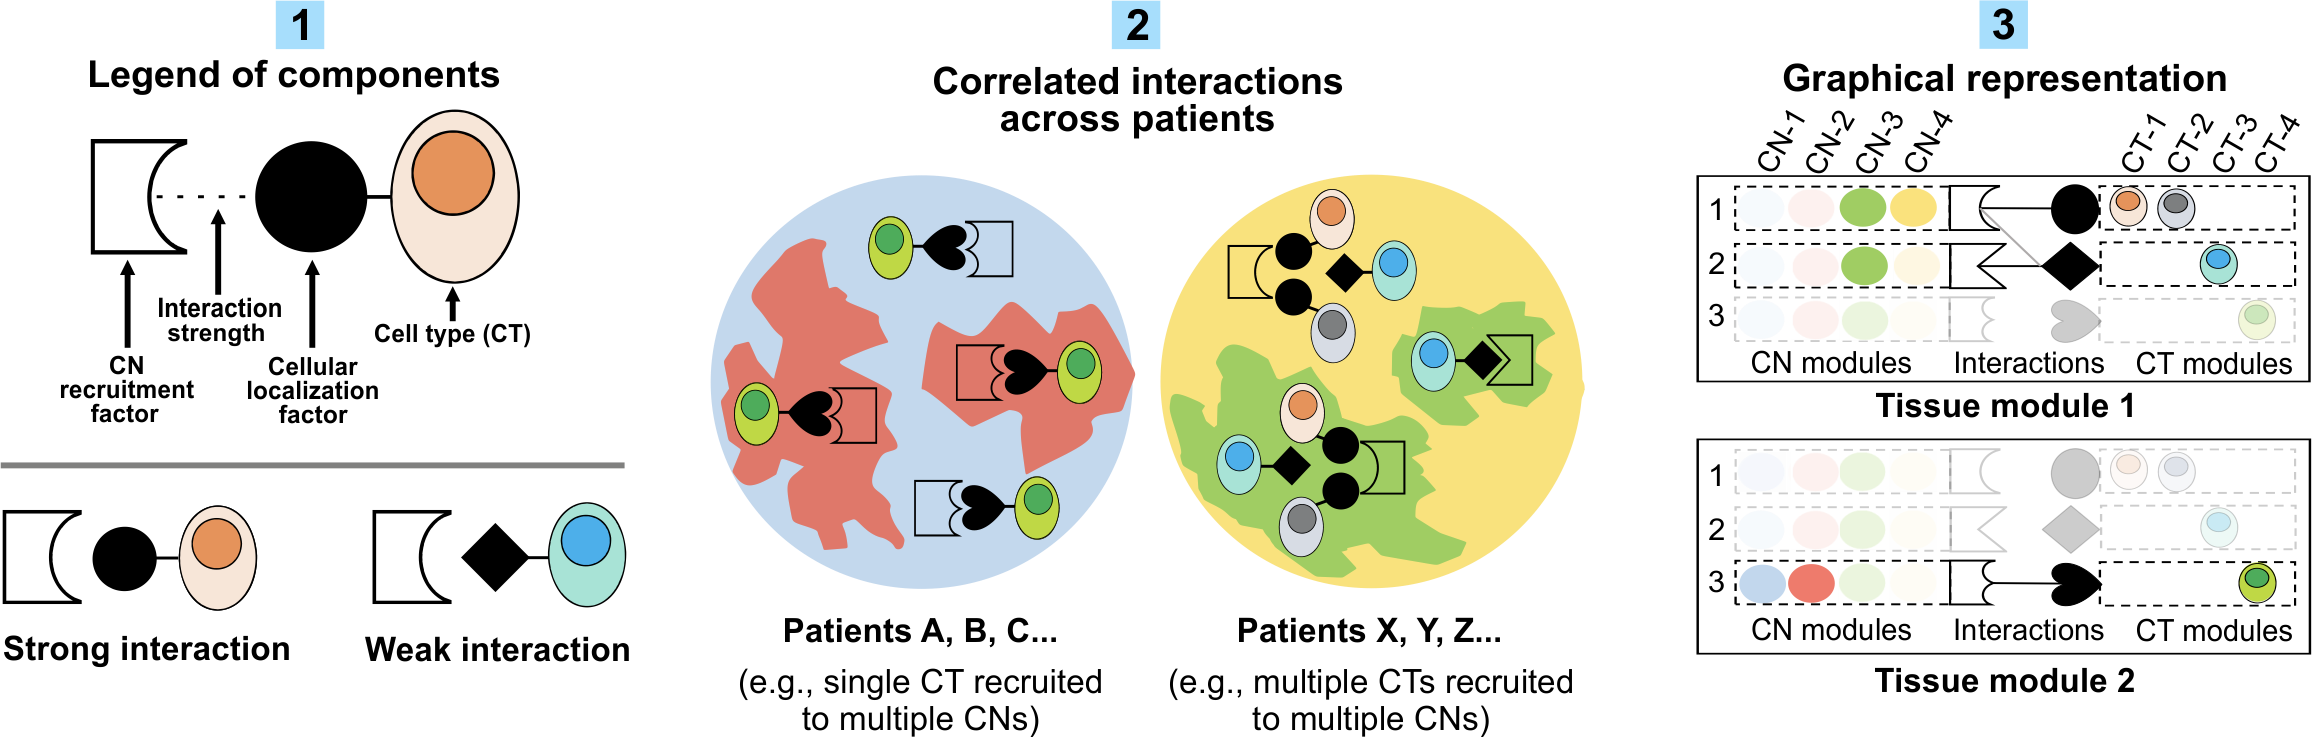

Schematic illustrating the interpretation of the tensor decomposition output. (1) Legend of components: A CN
module corresponds to a cell recruitment program utilized by the CNs comprising that module, and a CT module
corresponds to a cell type localization program utilized by the cell types comprising that module. Different pairs of
recruitment programs and localization programs interact to different strengths. (2) Different pairs of interacting
recruitment programs and localization programs co-occur to form the tissue through balanced interactions between
recruitment and localization factors. These combinations yield similar combinations of CNs and cell types within
them across patients. (3) Graphical representation of tissue modules corresponding to combinations of interacting
pairs, indicated by edges, of CN modules (left column) and CT modules (right column). CN modules and CT
modules are common across both tissue modules. In each tissue module, the transparency of each CN module and
CT module corresponds to the weight of the maximum edge of which it is part, i.e. indicating its contribution to
that tissue module.

In [ ]:
# Prepare IDs this could for example be the combination of patient ID and tissue type. Apart from that, the function assigns a number to each name from the neighborhood column
cells_df = prepare_neighborhood_df(cells_df, neighborhood_column = neighborhood_col, patient_ID_component1 = ID_component1, patient_ID_component2 = ID_component2) # this is a helper function 

# devide IDs/patients into groups
patient_to_group_dict = cells_df.loc[:,['patients',ID_component2]].drop_duplicates().set_index('patients').to_dict()[ID_component2]
group1_patients = [a for a,Sample_type in patient_to_group_dict.items() if Sample_type=="Biopsy"]
group2_patients = [a for a,Sample_type in patient_to_group_dict.items() if Sample_type=='Resection']

# Provide user feedback
print(group1_patients)

list(cells_df['Coarse Cell'].unique())
list(cells_df['neigh_num'].unique())

# select the cts
cts = list(cells_df['Coarse Cell'].unique()) # In theory you could select all cell types 
#cts =['Macrophage CD169+',   # It is very likely that a user wants to select specific cell types 
# 'CD4+ T cell',
# 'DC',
# 'Stromal',
#  'Tumor Ki67+',
#  'Tumor PDL1+ MHCI+',
#  'Tumor',
# 'Macrophage',
# 'Neutrophil',
# 'NK',
# 'CD8+ T cell PD1+',
# 'CD8+ T cell',
# 'CD4+ Treg',
# 'B cell']

# select the cns
cns = list(cells_df['neigh_num'].unique())
#cns = [0, 1, 2, 3, 4, 5, 6]

###

# Build the tensors for each patient group
counts = cells_df.groupby(['patients','neigh_num','Coarse Cell']).size()

#initialize the tensors

dat1 = build_tensors(df = cells_df, group = group1_patients, cns = cns, cts = cts)
dat2 = build_tensors(df = cells_df, group = group2_patients, cns = cns, cts = cts)

###

# The following tries different numbers of CN modules/CT modules to determine suitable rank for decomposition

evaluate_ranks(dat1,2)
plt.show()
evaluate_ranks(dat2,2)
plt.show()

plot_modules_heatmap(dat1, cns, cts)
plot_modules_heatmap(dat2, cns, cts)

# Set a save path MOVE THIS TO TOP OF SCIPT COMBINE WITH OUTPUT 
save_path = '/Users/timnoahkempchen/Downloads/'

pal = sns.color_palette('bright',30) # Choose some random colors to demonstrate that function in working 
plot_modules_graphical(dat1, pal = pal, cns = cns, cts = cts, save_name = 'T cell', save_path = output_dir, scale = 0.9)

# 5) Analysis dependent on community analysis 

## 5.1) Specify additional information

In [ ]:
col_list = cells_df2.columns

# Spatial context 
n_num = 75
ks=[n_num]
cluster_col = 'community'
sum_cols=cells_df2[cluster_col].unique()
keep_cols = col_list
X='x'
Y='y'
Reg = 'unique_region'
Neigh = Neighborhoods(cells_df2,ks,cluster_col,sum_cols,keep_cols,X,Y,reg=Reg,add_dummies=True)
windows = Neigh.k_windows()
Reg = "unique_region"

#Choose the windows size to continue with
w = windows[n_num]

n_neighborhoods=7
n2_name = 'neigh_ofneigh'
k_centroids = {}

km = MiniBatchKMeans(n_clusters = n_neighborhoods,random_state=0)
labels = km.fit_predict(w[sum_cols].values)
k_centroids[n_num] = km.cluster_centers_
w[n2_name] = labels

## Spatial context analysis 

**How does the function work:**
    
**What is the biological meaning of this analysis:**

The idea is to map where possible interactions might occur. The basic assumption is that local processes of CNs interact than two or more CNs contact. 
    

In [ ]:
windows, sum_cols = Create_neighborhoods(df = cells_df,
                     n_num = n_num,
                     cluster_col = 'community',
                     X = 'x',
                     Y = 'y',
                     reg = "unique_region",
                     sum_cols = None,
                     keep_cols = None,
                     ks = [n_num])

w, k_centroids = Chose_window_size(windows,
                      n_num = n_num,
                      n_neighborhoods = 10,
                      n2_name = 'neigh_ofneigh', sum_cols = sum_cols)

Niche_heatmap(k_centroids, w, n_num, sum_cols)


names = cells_df2[cluster_col].unique()
colors = generate_random_colors(n = len(names))

color_dic = assign_colors(names, colors)

pal_color=color_dic
l=list(pal_color.keys())



plot_list = list_n = [ 'Atrophic Cardiac Enriched', "Inflamed Stroma", 'Inflamed CK7hi Epithelial']

In [ ]:
Barycentric_coordinate_projection(w, 
                                      plot_list = plot_list, 
                                      threshold = 10, 
                                      output_dir = output_dir, 
                                      save_name = save_name, 
                                      col_dic = color_dic,
                                      l = l,
                                      cluster_col = cluster_col,
                                      n_num = n_num,
                                      SMALL_SIZE = 14, 
                                      MEDIUM_SIZE = 16, 
                                      BIGGER_SIZE = 18)

**CN combination map**

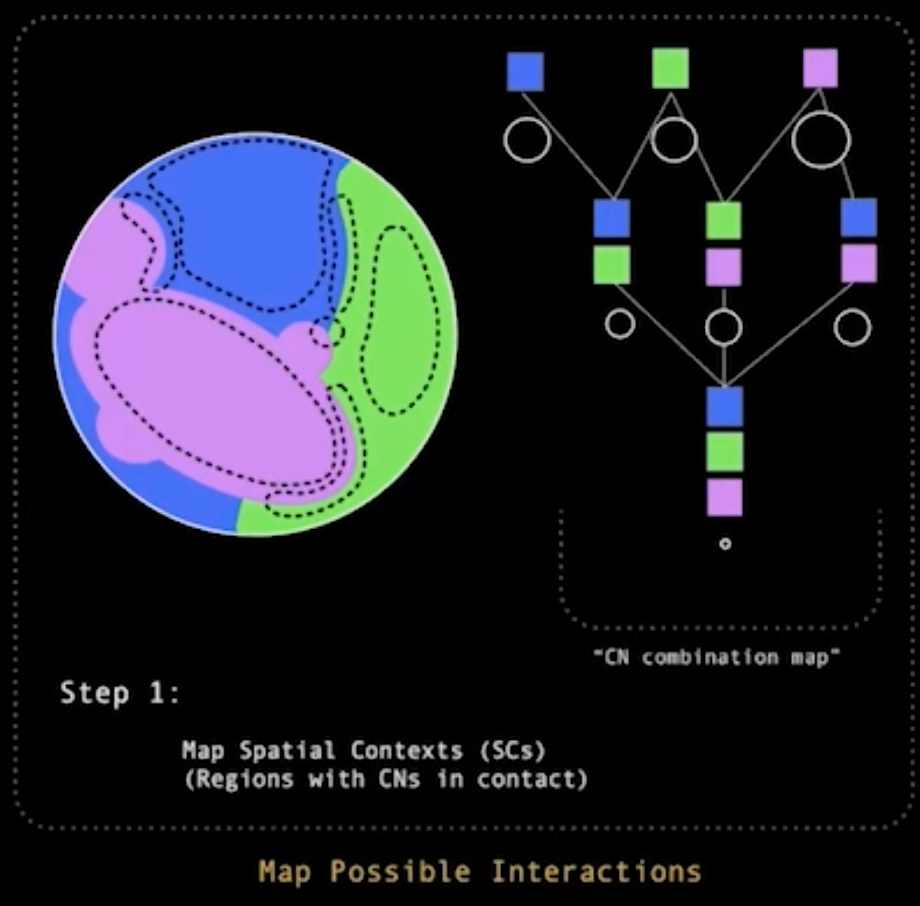

The graph shows differnet combinations of neightborhoods as well as single neighborhoods. The circles indicate the size of this specific modules and edges indicate the relationship of the individual CNs.





This is a Python function that plots a combination map of nodes and edges using the NetworkX and Matplotlib libraries. The function takes in a graph object called g, which is then used to calculate the positions of each node using the graphviz_layout function from the nx.drawing.nx_pydot module. The height variable is set to 8, which appears to determine the vertical spacing between nodes.

The function then sets the figure size to 40x20 using figsize(40,20), and loops through each node in the graph. For each node, the function determines its color based on the number of incoming edges and plots a scatter point with size determined by the value in the simp_freqs list that corresponds to the node. If the node is in the tops list, it is marked with an asterisk. The function then plots squares below the node for each element in the node, with color determined by the palt dictionary.

The function then loops through each edge in the graph and plots a line between the two nodes, with the color and thickness of the line determined by the number of incoming edges to the second node.

Finally, the function turns off the axis labels and displays the plot using plt.show(). The commented-out sections appear to contain code for adding additional information to the plot, such as profiles below each node and highlighting specific edges, but they are not currently being used.

In [ ]:
simps, simp_freqs, simp_sums = calculate_neigh_combs(w, 
                                                     l,
                                                     n_num, 
                                                     threshold = 0.85, 
                                                     per_keep_thres = 0.85)

g, tops, e0, e1 = build_graph_CN_comb_map(simp_freqs)

generate_CN_comb_map(graph = g, 
                     tops = tops, 
                     e0 = e0, 
                     e1 = e1, 
                     l = l,
                     simp_freqs = simp_freqs,
                     color_dic = color_dic)

In [ ]:
get_network(ttl_per_thres=0.9,
            comb_per_thres=0.005,
            neigh_sub = plot_list,
            save_name='All_comm',
            save_path = output_dir,
            sub_col = cluster_col, 
            color_dic = color_dic,
            windows = windows,
            n_num = n_num,
            l = l)

### Statistics

In [ ]:
simp_df_tissue1, simp_df_tissue2 = spatial_context_stats(windows, n_num, total_per_thres = 0.9, \
                      comb_per_thres = 0.005, \
                      tissue_column = 'Block type',\
                      subset_list = ["Resection"],\
                      plot_order = ['Resection','Biopsy'],\
                      pal_tis = {'Resection':'blue','Biopsy':'orange'},\
                      patient_ID_component1 = ID_component1, \
                      patient_ID_component2 = ID_component2,\
                      subset_list_tissue1 = ["Resection"],\
                      subset_list_tissue2 = ["Biopsy"])
    
print(simp_df_tissue1["combination"].values)  
print(simp_df_tissue2["combination"].values)     
     
simp_df_tissue1 = simp_df_tissue1.set_index("combination")
simp_df_tissue2 = simp_df_tissue2.set_index("combination")
    
spatial_context_stats_vis(neigh_comb = (9,),
                              simp_df_tissue1 = simp_df_tissue1,
                              simp_df_tissue2 = simp_df_tissue2,
                              pal_tis = {'Resection': 'blue', 'Biopsy': 'orange'},
                              plot_order = ['Resection', 'Biopsy'])

In [ ]:
input_file = "/Volumes/homes/admin/Marc/Annotations_U54_01_2023/neighborhoods/2023_03_19_PT_LN_sep_neighborhoods_k20_n10_windows_incl._neighborhood_names_unique_region.csv"
cells_df2 = pd.read_csv(input_file) 

In [ ]:
cells_df2.columns
cells_df2['neighb_names'].values

In [ ]:
col_list = cells_df2.columns

# Spatial context 
n_num = 75
ks=[n_num]
cluster_col = 'neighb_names'
sum_cols=cells_df2[cluster_col].unique()
keep_cols = col_list
X='x'
Y='y'
Reg = 'unique_region'
Neigh = Neighborhoods(cells_df2,ks,cluster_col,sum_cols,keep_cols,X,Y,reg=Reg,add_dummies=True)
windows = Neigh.k_windows()
Reg = "unique_region"

#Choose the windows size to continue with
w = windows[n_num]

n_neighborhoods=7
n2_name = 'neigh_ofneigh'
k_centroids = {}

km = MiniBatchKMeans(n_clusters = n_neighborhoods,random_state=0)
labels = km.fit_predict(w[sum_cols].values)
k_centroids[n_num] = km.cluster_centers_
w[n2_name] = labels

In [ ]:
windows, sum_cols = Create_neighborhoods(df = cells_df2,
                     n_num = n_num,
                     cluster_col = 'neighb_names',
                     X = 'x',
                     Y = 'y',
                     reg = "unique_region",
                     sum_cols = None,
                     keep_cols = None,
                     ks = [n_num])

w, k_centroids = Chose_window_size(windows,
                      n_num = n_num,
                      n_neighborhoods = 10,
                      n2_name = 'neigh_ofneigh', sum_cols = sum_cols)

Niche_heatmap(k_centroids, w, n_num, sum_cols)


names = cells_df2[cluster_col].unique()
colors = generate_random_colors(n = len(names))

color_dic = assign_colors(names, colors)

pal_color=color_dic
l=list(pal_color.keys())



plot_list = ["PT_tumor_boundary", "PT_immune_CD8T_enr", "PT_plasma"]

In [ ]:

def Barycentric_coordinate_projection(w, 
                                      plot_list, 
                                      threshold, 
                                      output_dir, 
                                      save_name, 
                                      col_dic, 
                                      l,
                                      n_num,
                                      cluster_col,
                                      SMALL_SIZE = 14, 
                                      MEDIUM_SIZE = 16, 
                                      BIGGER_SIZE = 18):
    
    #Settings for graph
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    lmap = {j:i for i,j in enumerate(l)}
    palt=col_dic
    
    wgc  = w.loc[w.loc[:,plot_list].sum(axis=1)>threshold,:]
    idx = wgc.index.values
    xl = wgc.loc[:,plot_list]
    proj = np.array([[0,0],[np.cos(np.pi/3),np.sin(np.pi/3)], [1,0]])
    coords = np.dot(xl/n_num,proj) #####window size fraction
    
    plt.figure(figsize=(14,14))
    jit = .002
    cols = [palt[a] for a in wgc[cluster_col]]
    
    plt.scatter(coords[:,0]+jit*np.random.randn(len(coords)),coords[:,1]+jit*np.random.randn(len(coords)),s = 1,alpha = .5, c = cols)
    plt.axis('off')
    plt.show()
    
    if save_name:
        plt.savefig(output_dir+save_name+'.png', format='png',\
                    dpi=300, transparent=True, bbox_inches='tight')
        


In [ ]:
Barycentric_coordinate_projection(w, 
                                      plot_list = plot_list, 
                                      threshold = 50, 
                                      output_dir = output_dir, 
                                      save_name = "popel_map", 
                                      col_dic = color_dic,
                                      l = l,
                                      cluster_col = cluster_col,
                                      n_num = n_num,
                                      SMALL_SIZE = 14, 
                                      MEDIUM_SIZE = 16, 
                                      BIGGER_SIZE = 18)

In [ ]:


def calculate_neigh_combs(w, l, n_num, threshold = 0.85, per_keep_thres = 0.85):
    w.loc[:,l]

    #need to normalize by number of neighborhoods or k chosen for the neighborhoods
    xm = w.loc[:,l].values/n_num


    # Get the neighborhood combinations based on the threshold
    simps = get_thresh_simps(xm, threshold)
    simp_freqs = simps.value_counts(normalize = True)
    simp_sums = np.cumsum(simp_freqs)


    #See the percent to keep threshold or percent of neigbhorhoods that fall above a certain threshold
    test_sums_thres =simp_sums[simp_sums < per_keep_thres]
    test_len = len(test_sums_thres)
    per_values_above = simp_sums[test_len]-simp_sums[test_len-1]
    print(test_len, per_values_above)


    w['combination'] = [tuple(l[a] for a in s) for s in simps]
    w['combination_num'] = [tuple(a for a in s) for s in simps]

    # this shows what proportion (y) of the total cells are assigned to the top x combinations
    #plt.figure(figsize(20,5))
    plt.plot(simp_sums.values)
    plt.title("proportion (y) of the total cells are assigned to the top x combinations")
    plt.show()

    # this shows what proportion (y) of the total cells are assigned to the top x combinations
    #plt.figure(figsize(20,5))
    plt.plot(test_sums_thres.values)
    plt.title("proportion (y) of the total cells are assigned to the top x combinations - thresholded")
    plt.show()
    #plt.xticks(range(0,350,35),range(0,350,35),rotation = 90,fontsize = 10)

    return(simps, simp_freqs, simp_sums)

def build_graph_CN_comb_map(simp_freqs):
    g = nx.DiGraph()
    thresh_cumulative = .95
    thresh_freq = .001
    #selected_simps = simp_sums[simp_sums<=thresh_cumulative].index.values
    selected_simps = simp_freqs[simp_freqs>=thresh_freq].index.values
    selected_simps
    
    
    '''
    this builds the graph for the CN combination map
    '''
    for e0 in selected_simps:
        for e1 in selected_simps:
            if (set(list(e0))<set(list(e1))) and (len(e1) == len(e0)+1):
                g.add_edge(e0,e1)
                
    tops = simp_freqs[simp_freqs>=thresh_freq].sort_values(ascending = False).index.values.tolist()[:20]
    
    return(g, tops, e0, e1)

def generate_CN_comb_map(graph, tops, e0, e1, l, simp_freqs, color_dic):
        
    draw = graph
    pos = nx.drawing.nx_pydot.graphviz_layout(draw, prog='dot')
    height = 8
    
    
    plt.figure(figsize=(40,20))
    for n in draw.nodes():
        col = 'black'
        if len(draw.in_edges(n))<len(n):
            col = 'black'
        plt.scatter(pos[n][0],pos[n][1]-5, s = simp_freqs[list(simp_freqs.index).index(n)]*10000, c = col, zorder = -1)
        if n in tops:
            plt.text(pos[n][0],pos[n][1]-7, '*', fontsize = 25, color = 'white', ha = 'center', va = 'center',zorder = 20)
        delta = 8
        #plot_sim((pos[n][0]+delta, pos[n][1]+delta),n, scale = 20,s = 200,text = True,fontsize = 15)
        plt.scatter([pos[n][0]]*len(n),[pos[n][1]+delta*(i+1) for i in range(len(n))],c = [color_dic[l[i]] for i in n] ,marker = 's', zorder = 5,s = 400)
        
    #     #add profiles below node
    #     x = pos[n][0]
    #     y = pos[n][1]
    #     y = y-height*2
    #     standard_node_size =  16
    #     node_heights = [0,3,8,5,3,2,1,5]
    #     marker_colors = ['red','red','blue','blue','red','red','blue','blue']
        
    #     plt.plot([x+(18*(i-1.5)) for i in range(len(node_heights))],[(y-height*.9)+v for v in node_heights],c = 'red',zorder =3)#,s = v*2 ,c= c,edgecolors='black',lw = 1)
    #     plt.scatter([x+(18*(i-1.5)) for i in range(len(node_heights))],[(y-height*.9)+v for v in node_heights],c = marker_colors,s = standard_node_size,zorder = 4)
        
            
    j = 0
    for e0,e1 in draw.edges():
        weight = 0.2
        alpha = .3
        color='black'
        if len(draw.in_edges(e1))<len(e1):
            color = 'black'
            lw =1
            weight = 0.4
            
    #     if (e0,e1) in set(draw.out_edges(tuple(sorted([lmap['3'],lmap['1']])))):
    #         j+=1
    #         print(j)
    #         color = 'green'
    #         weight = 2
    #         alpha = 1
            
    #     if (lmap['3'] in e0) and (lmap['1'] not in e0) and (lmap['1'] in e1):
    #         color = 'green'
    #         weight = 2
    #         alpha = 1
    
        plt.plot([pos[e0][0], pos[e1][0]],[pos[e0][1], pos[e1][1]], color = color, linewidth = weight,alpha = alpha,zorder = -10)
    
    plt.axis('off')
    #plt.savefig('CNM.pdf')
    plt.show()



In [ ]:
simps, simp_freqs, simp_sums = calculate_neigh_combs(w, 
                                                     l,
                                                     n_num, 
                                                     threshold = 0.85, 
                                                     per_keep_thres = 0.85)

g, tops, e0, e1 = build_graph_CN_comb_map(simp_freqs)

generate_CN_comb_map(graph = g, 
                     tops = tops, 
                     e0 = e0, 
                     e1 = e1, 
                     l = l,
                     simp_freqs = simp_freqs,
                     color_dic = color_dic)

In [ ]:
get_network(ttl_per_thres=0.9,
            comb_per_thres=0.005,
            neigh_sub = plot_list,
            save_name='All_comm',
            save_path = output_dir,
            sub_col = cluster_col, 
            color_dic = color_dic,
            windows = windows,
            n_num = n_num,
            l = l)